# Assignment 5 - Kaggle Competition and Unsupervised Learning

## *Luopeiwen Yi*
Netid: ly178

*Names of students you worked with on this assignment*: Jeremy Tan

Note: this assignment falls under collaboration Mode 2: Individual Assignment – Collaboration Permitted. Please refer to the syllabus for additional information.

Instructions for all assignments can be found [here](https://kylebradbury.github.io/ids705/notebooks/assignment_instructions.html).

Total points in the assignment add up to 90; an additional 10 points are allocated to presentation quality.

# Learning objectives
Through completing this assignment you will be able to...
1. Apply the full supervised machine learning pipeline of preprocessing, model selection, model performance evaluation and comparison, and model application to a real-world scale dataset
2. Apply clustering techniques to a variety of datasets with diverse distributional properties, gaining an understanding of their strengths and weaknesses and how to tune model parameters
3. Apply PCA and t-SNE for performing dimensionality reduction and data visualization

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import time

from sklearn.model_selection import PredefinedSplit
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
from scipy.stats import uniform, randint
from sklearn.metrics import (
    roc_curve,
    roc_auc_score,
    precision_recall_curve,
    auc as auc_score,
)
from sklearn.metrics import average_precision_score

# from lightgbm import LGBMClassifier

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import SpectralClustering
from sklearn.decomposition import PCA
from sklearn.metrics import pairwise_distances

import warnings

warnings.simplefilter(action="ignore", category=FutureWarning)

# Filter out the specific UserWarning related to loky's process executor
warnings.filterwarnings(
    "ignore",
    message="A worker stopped while some jobs were given to the executor.*",
    category=UserWarning,
)
warnings.filterwarnings(
    "ignore",
    message="X has feature names, but .* was fitted without feature names",
    category=UserWarning,
)

from sklearn.exceptions import ConvergenceWarning


# Ignore ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# 1

## [40 points] Kaggle Classification Competition

You've learned a great deal about supervised learning and now it's time to bring together all that you've learned. You will be competing in a Kaggle Competition along with the rest of the class! Your goal is to predict hotel reservation cancellations based on a number of potentially related factors such as lead time on the booking, time of year, type of room, special requests made, number of children, etc. While you will be asked to take certain steps along the way to your submission, you're encouraged to try creative solutions to this problem and your choices are wide open for you to make your decisions on how to best make the predictions.

### IMPORTANT: Follow the link posted on Ed to register for the competition
You can view the public leaderboard anytime at the Kaggle website (see the Ed post).

**The Data**. The dataset is provided as `a5_q1.pkl` which is a pickle file format, which allows you to load the data directly using the code below; the data can be downloaded from the Kaggle competition website (see Ed Discussions for the link). A data dictionary for the project can be found [here](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-02-11/readme.md) and the original paper that describes the dataset can be found [here](https://www.sciencedirect.com/science/article/pii/S2352340918315191). When you load the data, 5 matrices are provided `X_train_original`, `y_train`, and `X_test_original`, which are the original, unprocessed features and labels for the training set and the test features (the test labels are not provided - that's what you're predicting). Additionally, `X_train_ohe` and `X_test_ohe` are provided which are one-hot-encoded (OHE) versions of the data. The OHE versions OHE processed every categorical variable. This is provided for convenience if you find it helpful, but you're welcome to reprocess the original data other ways if your prefer.

**Scoring**. You will need to achieve a minimum acceptable level of performance to demonstrate proficiency with using these supervised learning techniques. Beyond that, it's an open competition and scoring in the top three places of the *private leaderboard* will result in **5 bonus points in this assignment** (and the pride of the class!). Note: the Kaggle leaderboard has a public and private component. The public component is viewable throughout the competition, but the private leaderboard is revealed at the end. When you make a submission, you immediately see your submission on the public leaderboard, but that only represents scoring on a fraction of the total collection of test data, the rest remains hidden until the end of the competition to prevent overfitting to the test data through repeated submissions. You will be be allowed to hand-select two eligible submissions for private score, or by default your best two public scoring submissions will be selected for private scoring.


### Requirements:

**(a) Explore your data.** Review and understand your data. Look at it; read up on what the features represent; think through the application domain; visualize statistics from the paper data to understand any key relationships. **There is no output required for this question**, but you are encouraged to explore the data personally before going further.

**(b) Preprocess your data.** Preprocess your data so it's ready for use for classification and describe what you did and why you did it. Preprocessing may include: normalizing data, handling missing or erroneous values, separating out a validation dataset, preparing categorical variables through one-hot-encoding, etc. To make one step in this process easier, you're provided with a one-hot-encoded version of the data already. 
- Comment on each type of preprocessing that you apply and both how and why you apply it.

**(c) Select, train, and compare models.** Fit at least 5 models to the data. Some of these can be experiments with different hyperparameter-tuned versions of the same model, although all 5 should not be the same type of model. There are no constraints on the types of models, but you're encouraged to explore examples we've discussed in class including:

1. Logistic regression
2. K-nearest neighbors
3. Random Forests
4. Neural networks
5. Support Vector Machines
6. Ensembles of models (e.g. model bagging, boosting, or stacking). `Scikit-learn` offers a number of tools for assisting with this including those for [bagging](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html#sklearn.ensemble.BaggingClassifier), [boosting](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html), and [stacking](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html). You're also welcome to explore options beyond the `sklean` universe; for example, some of you may have heard of [XGBoost](https://github.com/dmlc/xgboost) which is a very fast implementation of gradient boosted decision trees that also allows for parallelization. 

When selecting models, be aware that some models may take far longer than others to train. Monitor your output and plan your time accordingly. 

Assess the classification performance AND computational efficiency of the models you selected:
- Plot the ROC curves and PR curves for your models in two plots: one of ROC curves and one of PR curves. For each of these two plots, compare the performance of the models you selected above and trained on the training data, evaluating them on the validation data. Be sure to plot the line representing random guessing on each plot. You should plot all of the model's ROC curves on a single plot and the PR curves on a single plot. One of the models should also be your BEST performing submission on the Kaggle public leaderboard (see below). In the legends of each, include the area under the curve for each model (limit to 3 significant figures). For the ROC curve, this is the AUC; for the PR curve, this is the average precision (AP).
- As you train and validate each model time how long it takes to train and validate in each case and create a plot that shows both the training and prediction time for each model included in the ROC and PR curves.
- Describe: 
  - Your process of model selection and hyperparameter tuning
  - Which model performed best and your process for identifying/selecting it

**(d) Apply your model "in practice".** Make *at least* 5 submissions of different model results to the competition (more submissions are encouraged and you can submit up to 5 per day!). These do not need to be the same that you report on above, but you should select your *most competitive* models.
- Produce submissions by applying your model on the test data.
- Be sure to RETRAIN YOUR MODEL ON ALL LABELED TRAINING AND VALIDATION DATA before making your predictions on the test data for submission. This will help to maximize your performance on the test data.
- In order to get full credit on this problem you must achieve an AUC on the Kaggle public leaderboard above the "Benchmark" score on the public leaderboard.

### Guidance:
1. **Preprocessing**. You may need to preprocess the data for some of these models to perform well (scaling inputs or reducing dimensionality). Some of this preprocessing may differ from model to model to achieve the best performance. A helpful tool for creating such preprocessing and model fitting pipelines is the sklearn `pipeline` module which lets you group a series of processing steps together.
2. **Hyperparameters**. Hyperparameters may need to be tuned for some of the model you use. You may want to perform hyperparameter tuning for some of the models. If you experiment with different hyperparameters that include many model runs, you may want to apply them to a small subsample of your overall data before running it on the larger training set to be time efficient (if you do, just make sure to ensure your selected subset is representative of the rest of your data).
3. **Validation data**. You're encouraged to create your own validation dataset for comparing model performance; without this, there's a significant likelihood of overfitting to the data. A common choice of the split is 80% training, 20% validation. Before you make your final predictions on the test data, be sure to retrain your model on the entire dataset.
4. **Training time**. This is a larger dataset than you've worked with previously in this class, so training times may be higher that what you've experienced in the past. Plan ahead and get your model pipeline working early so you can experiment with the models you use for this problem and have time to let them run. 

### Starter code
Below is some code for (1) loading the data and (2) once you have predictions in the form of confidence scores for those classifiers, to produce submission files for Kaggle.

In [36]:
import pandas as pd
import numpy as np
import pickle

################################
# Load the data
################################
data = pd.read_pickle("a5_q1.pkl.zip", compression="zip")
# data = pd.read_pickle("a5_q1.pkl")

y_train = data["y_train"]
X_train_original = data["X_train"]  # Original dataset
X_train_ohe = data["X_train_ohe"]  # One-hot-encoded dataset

X_test_original = data["X_test"]
X_test_ohe = data["X_test_ohe"]

################################
# Produce submission
################################


def create_submission(confidence_scores, save_path):
    """Creates an output file of submissions for Kaggle

    Parameters
    ----------
    confidence_scores : list or numpy array
        Confidence scores (from predict_proba methods from classifiers) or
        binary predictions (only recommended in cases when predict_proba is
        not available)
    save_path : string
        File path for where to save the submission file.

    Example:
    create_submission(my_confidence_scores, './data/submission.csv')

    """
    import pandas as pd

    submission = pd.DataFrame({"score": confidence_scores})
    submission.to_csv(save_path, index_label="id")

**ANSWER**

**(a) Explore your data.** Review and understand your data. Look at it; read up on what the features represent; think through the application domain; visualize statistics from the paper data to understand any key relationships. **There is no output required for this question**, but you are encouraged to explore the data personally before going further.

> - My goal is to predict hotel cancellations in rooms booked from two hotels based on characteristics of the booking and those booking the room. See the assignment for more details.
> - The performance metric is area under the ROC curve (AUC).

In [3]:
# Print dataset shapes
print(f"Training set shape: {X_train_original.shape}")
print(f"Test set shape: {X_test_original.shape}")
print(f"One-hot-encoded training set shape: {X_train_ohe.shape}")
print(f"One-hot-encoded test set shape: {X_test_ohe.shape}\n")

Training set shape: (95512, 29)
Test set shape: (23878, 29)
One-hot-encoded training set shape: (95512, 940)
One-hot-encoded test set shape: (23878, 940)



In [4]:
# Display types of features
print("Type of Features:")
print(f"Original training dataset:\n{X_train_original.dtypes.value_counts()}\n")
print(f"One-hot-encoded training dataset:\n{X_train_ohe.dtypes.value_counts()}\n")

Type of Features:
Original training dataset:
int64      15
object     10
float64     4
Name: count, dtype: int64

One-hot-encoded training dataset:
uint8      923
int64       15
float64      2
Name: count, dtype: int64



In [5]:
# Summary statistics
print("Summary Statistics for Original Training Dataset:")
X_train_original.describe().transpose()

Summary Statistics for Original Training Dataset:


,count,mean,std,min,25%,50%,75%,max
lead_time,95512.0,103.849768,106.722804,0.00,18.00,69.0,160.0,709.0
arrival_date_year,95512.0,2016.157205,0.707470,2015.00,2016.00,2016.0,2017.0,2017.0
arrival_date_week_number,95512.0,27.152902,13.611204,1.00,16.00,27.0,38.0,53.0
arrival_date_day_of_month,95512.0,15.823038,8.786777,1.00,8.00,16.0,23.0,31.0
stays_in_weekend_nights,95512.0,0.928491,0.999940,0.00,0.00,1.0,2.0,19.0
stays_in_week_nights,95512.0,2.503288,1.918017,0.00,1.00,2.0,3.0,50.0
adults,95512.0,1.855746,0.596925,0.00,2.00,2.0,2.0,55.0
children,95510.0,0.103696,0.397763,0.00,0.00,0.0,0.0,3.0
babies,95512.0,0.007748,0.093348,0.00,0.00,0.0,0.0,9.0
is_repeated_guest,95512.0,0.031598,0.174929,0.00,0.00,0.0,0.0,1.0


In [6]:
print("Summary Statistics for One-Hot-Encoded Training Dataset:")
X_train_ohe.describe().transpose()

Summary Statistics for One-Hot-Encoded Training Dataset:


,count,mean,std,min,25%,50%,75%,max
lead_time,95512.0,103.849768,106.722804,0.0,18.0,69.0,160.0,709.0
arrival_date_year,95512.0,2016.157205,0.707470,2015.0,2016.0,2016.0,2017.0,2017.0
arrival_date_week_number,95512.0,27.152902,13.611204,1.0,16.0,27.0,38.0,53.0
arrival_date_day_of_month,95512.0,15.823038,8.786777,1.0,8.0,16.0,23.0,31.0
stays_in_weekend_nights,95512.0,0.928491,0.999940,0.0,0.0,1.0,2.0,19.0
...,...,...,...,...,...,...,...,...
company_543.0,95512.0,0.000021,0.004576,0.0,0.0,0.0,0.0,1.0
customer_type_Contract,95512.0,0.034017,0.181273,0.0,0.0,0.0,0.0,1.0
customer_type_Group,95512.0,0.004806,0.069157,0.0,0.0,0.0,0.0,1.0
customer_type_Transient,95512.0,0.750419,0.432773,0.0,1.0,1.0,1.0,1.0


In [7]:
print("Summary Statistics for Original Testing Dataset:")
X_test_original.describe().transpose()

Summary Statistics for Original Testing Dataset:


,count,mean,std,min,25%,50%,75%,max
lead_time,23878.0,104.658012,107.422248,0.0,18.0,70.0,161.0,737.0
arrival_date_year,23878.0,2016.153949,0.707509,2015.0,2016.0,2016.0,2017.0,2017.0
arrival_date_week_number,23878.0,27.214256,13.581023,1.0,16.0,28.0,38.0,53.0
arrival_date_day_of_month,23878.0,15.699054,8.756480,1.0,8.0,16.0,23.0,31.0
stays_in_weekend_nights,23878.0,0.924030,0.993302,0.0,0.0,1.0,2.0,18.0
stays_in_week_nights,23878.0,2.488357,1.868844,0.0,1.0,2.0,3.0,42.0
adults,23878.0,1.859033,0.502434,0.0,2.0,2.0,2.0,20.0
children,23876.0,0.104666,0.401747,0.0,0.0,0.0,0.0,10.0
babies,23878.0,0.008753,0.112309,0.0,0.0,0.0,0.0,10.0
is_repeated_guest,23878.0,0.033169,0.179080,0.0,0.0,0.0,0.0,1.0


In [8]:
print("Summary Statistics for One-Hot-Encoded Testing Dataset:")
X_test_ohe.describe().transpose()

Summary Statistics for One-Hot-Encoded Testing Dataset:


,count,mean,std,min,25%,50%,75%,max
lead_time,23878.0,104.658012,107.422248,0.0,18.0,70.0,161.0,737.0
arrival_date_year,23878.0,2016.153949,0.707509,2015.0,2016.0,2016.0,2017.0,2017.0
arrival_date_week_number,23878.0,27.214256,13.581023,1.0,16.0,28.0,38.0,53.0
arrival_date_day_of_month,23878.0,15.699054,8.756480,1.0,8.0,16.0,23.0,31.0
stays_in_weekend_nights,23878.0,0.924030,0.993302,0.0,0.0,1.0,2.0,18.0
...,...,...,...,...,...,...,...,...
company_543.0,23878.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
customer_type_Contract,23878.0,0.034634,0.182856,0.0,0.0,0.0,0.0,1.0
customer_type_Group,23878.0,0.004942,0.070125,0.0,0.0,0.0,0.0,1.0
customer_type_Transient,23878.0,0.751277,0.432282,0.0,1.0,1.0,1.0,1.0


In [9]:
# Missing values in training dataset
missing_values_orig = X_train_original.isnull().sum()
missing_values_ohe = X_train_ohe.isnull().sum()

print("Missing Values in Original Training Dataset:")
print(
    missing_values_orig[missing_values_orig > 0], "\n"
)  # Only show columns with missing values

print("Missing Values in One-Hot-Encoded Training Dataset:")
print(
    missing_values_ohe[missing_values_ohe > 0], "\n"
)  # Only show columns with missing values

Missing Values in Original Training Dataset:
children        2
country       395
agent       13081
company     90059
dtype: int64 

Missing Values in One-Hot-Encoded Training Dataset:
children    2
dtype: int64 



In [10]:
# Checking for missing values in the original test dataset
missing_values_orig_test = X_test_original.isnull().sum()

# Checking for missing values in the one-hot-encoded test dataset
missing_values_ohe_test = X_test_ohe.isnull().sum()

print("Missing Values in Original Test Dataset:")
print(
    missing_values_orig_test[missing_values_orig_test > 0], "\n"
)  # Only show columns with missing values

print("Missing Values in One-Hot-Encoded Test Dataset:")
print(
    missing_values_ohe_test[missing_values_ohe_test > 0], "\n"
)  # Only show columns with missing values

Missing Values in Original Test Dataset:
children        2
country        93
agent        3259
company     22534
dtype: int64 

Missing Values in One-Hot-Encoded Test Dataset:
children    2
dtype: int64 



In [45]:
# Display the total number of labels in y_train
print(f"Total number of labels in training data: {y_train.shape[0]}")

# Display the count of each unique label value in y_train
print("\nDistribution of labels in training data:")
print(y_train.value_counts())

Total number of labels in training data: 95512

Distribution of labels in training data:
is_canceled
0    60123
1    35389
Name: count, dtype: int64


In [11]:
# For a binary classification where '1' indicates 'is canceled' and '0' indicates 'not canceled'
class_1 = y_train[y_train == 1]
class_0 = y_train[y_train == 0]
print(
    "Number of examples in class 1 ('is canceled') in training data:", class_1.shape[0]
)
print(
    "Number of examples in class 0 ('not canceled') in training data:", class_0.shape[0]
)

Number of examples in class 1 ('is canceled') in training data: 35389
Number of examples in class 0 ('not canceled') in training data: 60123


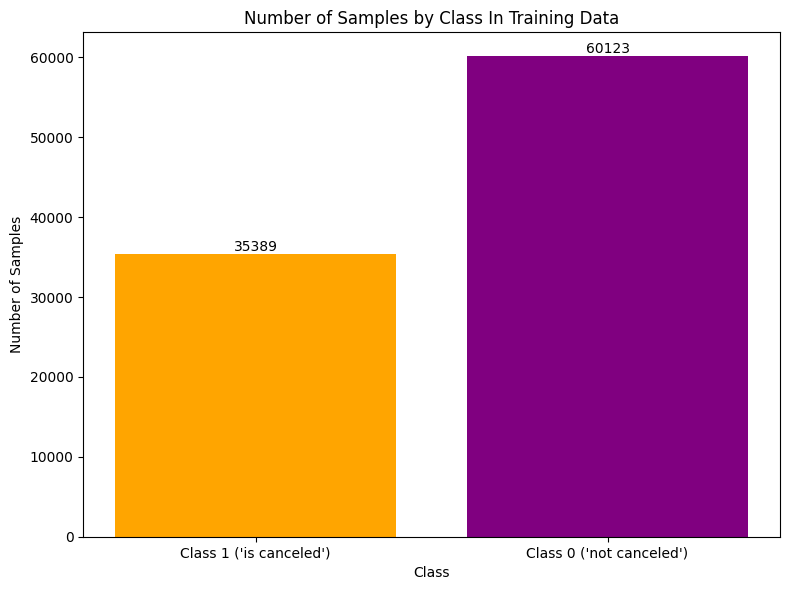

In [12]:
# Bar plot of samples by class

# define class and samples list
classes = ["Class 1 ('is canceled')", "Class 0 ('not canceled')"]
samples = [class_1.shape[0], class_0.shape[0]]

# Plotting
plt.figure(figsize=(8, 6))
bars = plt.bar(classes, samples, color=["orange", "purple"])

# Adding the count above the bar
for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2, yval + 0.5, yval, ha="center", va="bottom"
    )

plt.xlabel("Class")
plt.ylabel("Number of Samples")
plt.title("Number of Samples by Class In Training Data")
plt.tight_layout()
plt.show()

In [13]:
fraction_positive = class_1.shape[0] / (class_1.shape[0] + class_0.shape[0])
print(
    f"Fraction of samples that are positive being in Class 1 ('is canceled') is around: {fraction_positive:.2%}"
)

Fraction of samples that are positive being in Class 1 ('is canceled') is around: 37.05%


**(b) Preprocess your data.** Preprocess your data so it's ready for use for classification and describe what you did and why you did it. Preprocessing may include: normalizing data, handling missing or erroneous values, separating out a validation dataset, preparing categorical variables through one-hot-encoding, etc. To make one step in this process easier, you're provided with a one-hot-encoded version of the data already. 
- Comment on each type of preprocessing that you apply and both how and why you apply it.

1. **Preprocessing**. You may need to preprocess the data for some of these models to perform well (scaling inputs or reducing dimensionality). Some of this preprocessing may differ from model to model to achieve the best performance. A helpful tool for creating such preprocessing and model fitting pipelines is the sklearn `pipeline` module which lets you group a series of processing steps together.

3. **Validation data**. You're encouraged to create your own validation dataset for comparing model performance; without this, there's a significant likelihood of overfitting to the data. A common choice of the split is 80% training, 20% validation. Before you make your final predictions on the test data, be sure to retrain your model on the entire dataset.

In [14]:
random_state = 0

> **Separating Out a Validation Dataset**
>- I created my own validation dataset for comparing model performance; without this, there's a significant likelihood of overfitting to the data. 
>- I chose to split 80% training, 20% validation. I also created train plus val for final performance evaluation.

In [15]:
# Splitting the dataset while keeping stratification in mind, if applicable
X_train_1, X_val_1, y_train_1, y_val_1 = train_test_split(
    X_train_ohe, y_train, test_size=0.2, random_state=random_state
)

# For RandomSeachCV, we will need to combine training and validation sets then
#  specify which portion is training and which is validation
# Also, for the final performance evaluation, train on all of the training AND validation data
X_train_plus_val = np.concatenate((X_train_1, X_val_1), axis=0)
y_train_plus_val = np.concatenate((y_train_1, y_val_1), axis=0)

# Create a predefined train/test split for RandomSearchCV (to be used later)
# validation_fold = np.concatenate((-1 * np.ones(len(y_train_1)), np.zeros(len(y_val_1))))
# train_val_split = PredefinedSplit(validation_fold)

> **Handling Missing Values**
>- For the 'children' feature, there are 2 missing values.
>- I impute these missing values with the median, which is robust to outliers (less sensitive to outliers than the mean).
>- I use SimpleImputer(strategy="median") to impute missing values in the sklearn pipelines.

> **Normalizing Data**
>- According the description of the training data, numerical features's mean is not close to 0 and standard deviation is not close to 1. They have a different range of values and variability, indicating significant scale differences and need for normalization.
>- I use StandardScaler() to normalize data in the sklearn pipelines.

> **Handling Imbalanced Data**
>- According to the description of the training data, it is an imbalanced dataset, where the number of samples in one class significantly outnumbers the samples in another class. Imbalanced dataset can lead to biased model that performs well on the majority class but performs poorly on the minority class. There's a risk of overfitting to the majority class while failing to generalize well to unseen data, especially for the minority class.
>- I use the class weight techniques in some models to balance the data in the sklearn pipeline. 

> **Initialize Model Pipelines**
>- Logistic regression
>- K-nearest neighbors
>- Random Forests
>- Catboost
>- XGBoost

In [16]:
# generate initial pipelines for models

# logistic regression pipeline
logistic_regression_pipeline = Pipeline(
    [
        ("imputer", SimpleImputer(strategy="median")),  # Impute missing values
        ("scaler", StandardScaler()),
        (
            "classifier",
            LogisticRegression(class_weight="balanced", random_state=random_state),
        ),  # handle imbalanced data
    ]
)

# knn pipeline
knn_pipeline = Pipeline(
    [
        ("imputer", SimpleImputer(strategy="median")),  # Impute missing values
        ("scaler", StandardScaler()),
        ("classifier", KNeighborsClassifier()),
    ]
)

# random forest pipeline
random_forest_pipeline = Pipeline(
    [
        ("imputer", SimpleImputer(strategy="median")),  # Impute missing values
        ("scaler", StandardScaler()),
        (
            "classifier",
            RandomForestClassifier(class_weight="balanced", random_state=random_state),
        ),  # handle imbalanced data
    ]
)

# catboost pipeline
catboost_pipeline = Pipeline(
    [
        ("imputer", SimpleImputer(strategy="median")),  # Impute missing values
        ("scaler", StandardScaler()),
        # handle imbalanced data
        (
            "classifier",
            CatBoostClassifier(
                auto_class_weights="Balanced", verbose=0, random_state=random_state
            ),
        ),
    ]
)

# xgboost pipeline
xgboost_pipeline = Pipeline(
    [
        ("imputer", SimpleImputer(strategy="median")),  # Impute missing values
        ("scaler", StandardScaler()),
        # handle imbalanced data
        (
            "classifier",
            XGBClassifier(
                scale_pos_weight=(len(y_train) - sum(y_train)) / sum(y_train),
                random_state=random_state,
            ),
        ),
    ]
)

**(c) Select, train, and compare models.** Fit at least 5 models to the data. Some of these can be experiments with different hyperparameter-tuned versions of the same model, although all 5 should not be the same type of model. There are no constraints on the types of models, but you're encouraged to explore examples we've discussed in class including:

1. Logistic regression
2. K-nearest neighbors
3. Random Forests
4. Neural networks
5. Support Vector Machines
6. Ensembles of models (e.g. model bagging, boosting, or stacking). `Scikit-learn` offers a number of tools for assisting with this including those for [bagging](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html#sklearn.ensemble.BaggingClassifier), [boosting](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html), and [stacking](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html). You're also welcome to explore options beyond the `sklean` universe; for example, some of you may have heard of [XGBoost](https://github.com/dmlc/xgboost) which is a very fast implementation of gradient boosted decision trees that also allows for parallelization. 

When selecting models, be aware that some models may take far longer than others to train. Monitor your output and plan your time accordingly. 

2. **Hyperparameters**. Hyperparameters may need to be tuned for some of the model you use. You may want to perform hyperparameter tuning for some of the models. If you experiment with different hyperparameters that include many model runs, you may want to apply them to a small subsample of your overall data before running it on the larger training set to be time efficient (if you do, just make sure to ensure your selected subset is representative of the rest of your data).

Assess the classification performance AND computational efficiency of the models you selected:
- Plot the ROC curves and PR curves for your models in two plots: one of ROC curves and one of PR curves. For each of these two plots, compare the performance of the models you selected above and trained on the training data, evaluating them on the validation data. Be sure to plot the line representing random guessing on each plot. You should plot all of the model's ROC curves on a single plot and the PR curves on a single plot. One of the models should also be your BEST performing submission on the Kaggle public leaderboard (see below). In the legends of each, include the area under the curve for each model (limit to 3 significant figures). For the ROC curve, this is the AUC; for the PR curve, this is the average precision (AP).
- As you train and validate each model time how long it takes to train and validate in each case and create a plot that shows both the training and prediction time for each model included in the ROC and PR curves.
- Describe: 
  - Your process of model selection and hyperparameter tuning
  - Which model performed best and your process for identifying/selecting it

> Logistic Regression

In [20]:
# Generate 20 logarithmically spaced values for C between 10^-4 and 10^4
C_values = np.logspace(-4, 4, num=20)

# Evaluate L1 regularization strengths for reducing features in final model
# As C (1/λ) decreases, more coefficients go to zero

# create list to store the auc
auc_list_lr = []

for c in C_values:
    # logistic regression with l1 penalty
    clf = Pipeline(
        [
            ("imputer", SimpleImputer(strategy="median")),
            ("scaler", StandardScaler()),
            (
                "classifier",
                LogisticRegression(
                    class_weight="balanced",  # balance class weight
                    penalty="l1",  # lasso
                    C=c,
                    solver="saga",  # large dataset
                    max_iter=1000,  # increase max iter to help with convergence
                    random_state=random_state,
                ),
            ),  # handle imbalanced data
        ]
    )
    # fit the model with training data
    clf.fit(X_train_1, y_train_1)
    # get probability estimates for all classes
    clf_score = clf.predict_proba(X_val_1)[:, 1]

    # Metrics calculation
    auc = roc_auc_score(y_val_1, clf_score)

    # Store metrics
    auc_list_lr.append(auc)

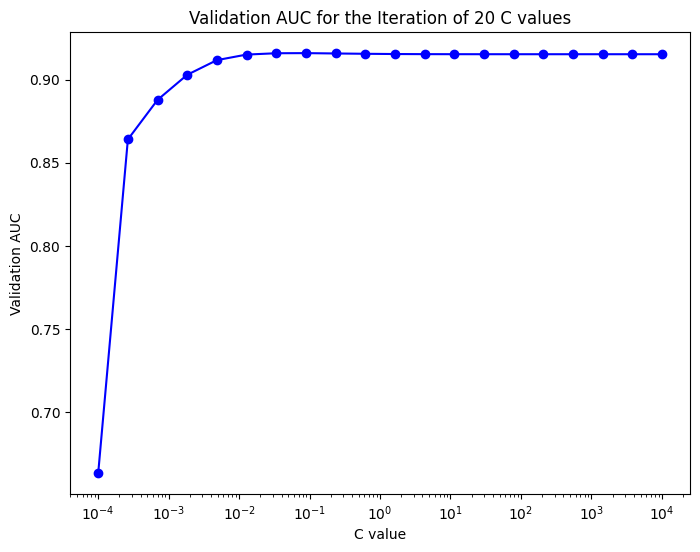

In [21]:
# Plotting the AUC for different values of C

# set figure size
plt.figure(figsize=(8, 6))

# Plotting the AUC
plt.plot(C_values, auc_list_lr, marker="o", color="blue")
plt.xlabel("C value")
plt.ylabel("Validation AUC")
plt.title("Validation AUC for the Iteration of 20 C values")
plt.xscale("log")  # Set the x-axis to a logarithmic scale

# Set x-ticks
tick_values = [10**i for i in range(-4, 5)]  # Generates 10^-4, 10^-3, ..., 10^4
plt.xticks(tick_values, labels=[f"$10^{{{i}}}$" for i in range(-4, 5)])

plt.show()

In [60]:
# Find the index of the maximum AUC score in the auc_list_lr
max_auc_index_lr = auc_list_lr.index(max(auc_list_lr))

# Use this index to find the corresponding best C value
best_c = C_values[max_auc_index_lr]

# Print the best AUC score and its corresponding C value
print(f"Best AUC Score: {round(max(auc_list_lr),4)}")
print(f"Corresponding C Value: {best_c}")

Best AUC Score: 0.9159
Corresponding C Value: 0.08858667904100823


In [62]:
# Save the best C value to a file
with open("best_c_lr.pkl", "wb") as file:
    pickle.dump(best_c, file)

In [21]:
with open("best_c_lr.pkl", "rb") as file:
    best_c = pickle.load(file)

In [46]:
# Define the logistic regression pipeline with the best C value
best_lr_pipeline = Pipeline(
    [
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler()),
        (
            "classifier",
            LogisticRegression(
                class_weight="balanced",
                penalty="l1",
                C=best_c,  # Use the best C value here
                solver="saga",
                max_iter=1000,
                random_state=random_state,
            ),
        ),
    ]
)

# Fit the pipeline on the training data
start = time.time()
best_lr_pipeline.fit(X_train_1, y_train_1)
end = time.time()
time_train_lr = end - start
print(f"Time to train Logistic Regression: {round(time_train_lr, 4)}")

# Predict the probabilities on the validation data
start = time.time()
y_val_pred_proba_lr = best_lr_pipeline.predict_proba(X_val_1)[:, 1]
end = time.time()
time_val_lr = end - start
print(
    f"Time to predict on validation data for Logistic Regression: {round(time_val_lr, 4)}"
)

# Calculate the ROC AUC score for the logistic regression model on the validation data
roc_auc_lr_val = roc_auc_score(y_val_1, y_val_pred_proba_lr)
print(
    f"ROC AUC score for Logistic Regression on validation data: {round(roc_auc_lr_val, 4)}"
)

Time to train Logistic Regression: 999.5894
Time to predict on validation data for Logistic Regression: 0.3389
ROC AUC score for Logistic Regression on validation data: 0.9159


In [58]:
# Compute ROC curve for Logistic Regression
fpr_lr, tpr_lr, _ = roc_curve(y_val_1, y_val_pred_proba_lr)
# Compute AUC score for ROC curve for Logistic Regression
roc_auc_lr = auc_score(fpr_lr, tpr_lr)

# Compute PR curve for Logistic Regression
precision_lr, recall_lr, _ = precision_recall_curve(y_val_1, y_val_pred_proba_lr)
# Compute the AP score for Logistic Regression
average_precision_lr = average_precision_score(y_val_1, y_val_pred_proba_lr)

> KNN

In [50]:
# Initialize list to store the AUC scores
auc_list_knn = []

# Evaluate K from 1 to 50
for k in range(1, 51):
    # Define the KNN pipeline with k neighbors
    knn_pipeline = Pipeline(
        [
            ("imputer", SimpleImputer(strategy="median")),
            ("scaler", StandardScaler()),
            ("classifier", KNeighborsClassifier(n_neighbors=k)),
        ]
    )

    # Fit the model with training data
    knn_pipeline.fit(X_train_1, y_train_1)

    # Predict probabilities on the validation data
    knn_score = knn_pipeline.predict_proba(X_val_1)[:, 1]

    # Calculate AUC score and store it
    auc = roc_auc_score(y_val_1, knn_score)
    auc_list_knn.append(auc)

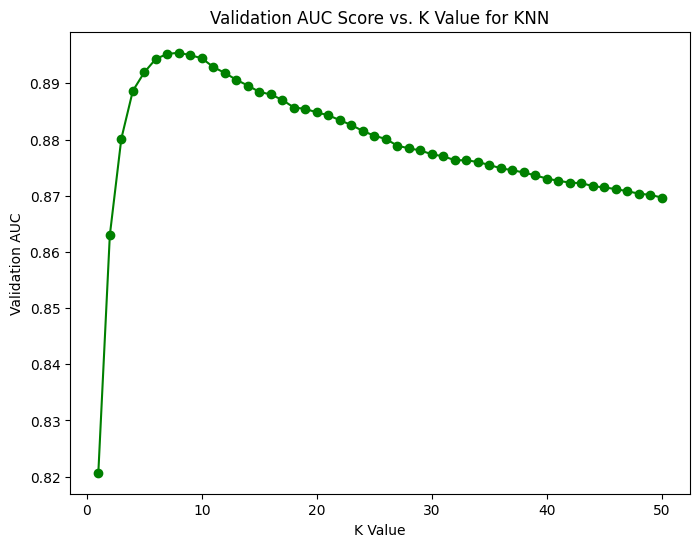

In [52]:
# Set figure size
plt.figure(figsize=(8, 6))

k_values = range(1, 51)  # K values from 1 to 50

# Plotting the AUC
plt.plot(k_values, auc_list_knn, marker="o", color="green")
plt.xlabel("K Value")
plt.ylabel("Validation AUC")
plt.title("Validation AUC Score vs. K Value for KNN")

plt.show()

In [53]:
# find the index of the highest AUC
max_auc_knn = max(auc_list_knn)
max_auc_index_knn = np.argmax(auc_list_knn)
best_k = max_auc_index_knn + 1
print(
    f"The optimal value of k is {best_k} "
    f"because it maximizes the auc score, which is around {round(max_auc_knn,4)}, on validation dataset."
)

The optimal value of k is 8 because it maximizes the auc score, which is around 0.8954, on validation dataset.


In [74]:
# Save the best k value to a file
with open("best_k_knn.pkl", "wb") as file:
    pickle.dump(best_k, file)

In [20]:
# Open the best k value as a file
with open("best_k_knn.pkl", "rb") as file:
    best_k = pickle.load(file)

In [54]:
# Define the KNN pipeline with the best parameters (n_neighbors=8)
best_knn_pipeline = Pipeline(
    [
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler()),
        ("classifier", KNeighborsClassifier(n_neighbors=best_k)),
    ]
)

# Fit the pipeline on the training data
start = time.time()
best_knn_pipeline.fit(X_train_1, y_train_1)
end = time.time()
time_train_knn = end - start
print(f"Time to train KNN: {round(time_train_knn, 4)}")

# Predict the probabilities on the validation data
start = time.time()
y_val_pred_proba_knn = best_knn_pipeline.predict_proba(X_val_1)[:, 1]
end = time.time()
time_val_knn = end - start
print(f"Time to predict on validation data for KNN: {round(time_val_knn, 4)}")

# Calculate the ROC AUC score for the KNN model on the validation data
roc_auc_knn_val = roc_auc_score(y_val_1, y_val_pred_proba_knn)
print(f"ROC AUC score for KNN on validation data: {round(roc_auc_knn_val, 4)}")

Time to train KNN: 8.1044
Time to predict on validation data for KNN: 17.1606
ROC AUC score for KNN on validation data: 0.8954


In [60]:
# Compute ROC curve for KNN
fpr_knn, tpr_knn, _ = roc_curve(y_val_1, y_val_pred_proba_knn)
# Compute AUC score for ROC curve for KNN
roc_auc_knn = auc_score(fpr_knn, tpr_knn)

# Compute PR curve for KNN
precision_knn, recall_knn, _ = precision_recall_curve(y_val_1, y_val_pred_proba_knn)
# Compute the AP score for KNN
average_precision_knn = average_precision_score(y_val_1, y_val_pred_proba_knn)

> Random Forest

In [27]:
# Define the Random Forest pipeline
random_forest_pipeline = Pipeline(
    [
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler()),
        (
            "classifier",
            RandomForestClassifier(class_weight="balanced", random_state=random_state),
        ),
    ]
)

# Define the parameter distributions to sample from
param_distributions = {
    "classifier__n_estimators": sp_randint(
        100, 500
    ),  # Randomly choose between 100 and 500 trees
    "classifier__max_depth": [None]
    + list(range(5, 51)),  # No limit or a depth between 5 and 50
    "classifier__min_samples_split": sp_randint(
        2, 11
    ),  # Minimum number of samples required to split, between 2 and 10
    "classifier__min_samples_leaf": sp_randint(
        1, 11
    ),  # Minimum number of samples required at a leaf node, between 1 and 10
}

# Setup RandomizedSearchCV
random_search_rf = RandomizedSearchCV(
    estimator=random_forest_pipeline,
    param_distributions=param_distributions,
    n_iter=50,
    cv=5,
    scoring="roc_auc",
    verbose=1,
    random_state=random_state,
    n_jobs=-1,
)

# Fit RandomizedSearchCV to the training data
random_search_rf.fit(X_train_1, y_train_1)

# Print the best parameters and the best score
print(f"Best parameters for Random Forest: {random_search_rf.best_params_}")
print(
    f"Best training ROC AUC for Random Forest: {round(random_search_rf.best_score_,4)}"
)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


Best parameters for Random Forest: {'classifier__max_depth': 43, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 3, 'classifier__n_estimators': 365}
Best training ROC AUC for Random Forest: 0.9543


In [70]:
# Save the best parameters to a file
with open("best_params_rf.pkl", "wb") as file:
    pickle.dump(random_search_rf.best_params_, file)

In [17]:
with open("best_params_rf.pkl", "rb") as file:
    best_params_rf = pickle.load(file)

In [18]:
# Remove the 'classifier__' prefix from the parameter names
best_params_rf_cleaned = {
    k.replace("classifier__", ""): v for k, v in best_params_rf.items()
}

# Define the Random Forest pipeline with the best parameters
best_random_forest_pipeline = Pipeline(
    [
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler()),
        (
            "classifier",
            RandomForestClassifier(
                **best_params_rf_cleaned,  # Use the unpacked, cleaned parameters
                class_weight="balanced",
                random_state=random_state,
            ),
        ),
    ]
)

start = time.time()
# Fit the pipeline on the training data
best_random_forest_pipeline.fit(X_train_1, y_train_1)
end = time.time()

time_train_rf = end - start
print(f"Time to train Random Forest: {round(time_train_rf, 4)}")

start = time.time()
# Predict the probabilities on the validation data
y_val_pred_proba_rf = best_random_forest_pipeline.predict_proba(X_val_1)[:, 1]
end = time.time()

time_val_rf = end - start
print(f"Time to predict on validation data for Random Forest: {round(time_val_rf, 4)}")

# Calculate the ROC AUC score
roc_auc_rf_val = roc_auc_score(y_val_1, y_val_pred_proba_rf)

print(f"ROC AUC score for Random Forest on validation data: {round(roc_auc_rf_val, 4)}")

Time to train Random Forest: 143.8109
Time to predict on validation data for Random Forest: 2.371
ROC AUC score for Random Forest on validation data: 0.9606


In [61]:
# Compute ROC curve for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_val_1, y_val_pred_proba_rf)
# Compute AUC score for ROC curve for Random Forest
roc_auc_rf = auc_score(fpr_rf, tpr_rf)

# Compute PR curve for Random Forest
precision_rf, recall_rf, _ = precision_recall_curve(y_val_1, y_val_pred_proba_rf)
# Compute the AP score for Random Forest
average_precision_rf = average_precision_score(y_val_1, y_val_pred_proba_rf)

> Catboost

In [29]:
# Define the CatBoost pipeline
catboost_pipeline = Pipeline(
    [
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler()),
        (
            "classifier",
            CatBoostClassifier(
                auto_class_weights="Balanced", verbose=0, random_state=random_state
            ),
        ),
    ]
)

# Define the parameter distributions to sample from
param_distributions = {
    "classifier__learning_rate": uniform(0.01, 0.3),  # Boosting learning rate
    "classifier__depth": [4, 6, 8, 10],  # Depth of the tree
    "classifier__iterations": [100, 200, 300, 400, 500],  # Number of trees
}

# Setup RandomizedSearchCV
random_search_catboost = RandomizedSearchCV(
    estimator=catboost_pipeline,
    param_distributions=param_distributions,
    n_iter=50,
    cv=5,
    scoring="roc_auc",
    verbose=1,
    random_state=random_state,
    n_jobs=-1,
)


# Fit RandomizedSearchCV to the training data
random_search_catboost.fit(X_train_1, y_train_1)

# Print the best parameters and the best score
print(f"Best parameters for CatBoost: {random_search_catboost.best_params_}")
print(
    f"Best training ROC AUC for CatBoost: {round(random_search_catboost.best_score_,4)}"
)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


Best parameters for CatBoost: {'classifier__depth': 10, 'classifier__iterations': 500, 'classifier__learning_rate': 0.21454608973104503}
Best training ROC AUC for CatBoost: 0.9559


In [64]:
best_params_catboost = random_search_catboost.best_params_

# Save the best parameters to a file
with open("best_params_catboost.pkl", "wb") as file:
    pickle.dump(best_params_catboost, file)

In [74]:
# open the best parameters as a file
with open("best_params_catboost.pkl", "rb") as file:
    best_params_catboost = pickle.load(file)

In [25]:
# Remove the 'classifier__' prefix from the parameter names
best_params_catboost_cleaned = {
    k.replace("classifier__", ""): v for k, v in best_params_catboost.items()
}

# Define the CatBoost pipeline with the dynamically applied best parameters
best_catboost_pipeline = Pipeline(
    [
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler()),
        (
            "classifier",
            CatBoostClassifier(
                **best_params_catboost_cleaned,  # Use the unpacked, cleaned parameters
                auto_class_weights="Balanced",
                verbose=0,
                random_state=random_state,  # Ensure random_state is defined
            ),
        ),
    ]
)

# Fit the pipeline on the training data
start = time.time()
best_catboost_pipeline.fit(X_train_1, y_train_1)
end = time.time()

time_train_catboost = end - start
print(f"Time to train CatBoost: {round(time_train_catboost, 4)} seconds")

# Predict the probabilities on the validation data
start = time.time()
y_val_pred_proba_cb = best_catboost_pipeline.predict_proba(X_val_1)[:, 1]
end = time.time()

time_val_catboost = end - start
print(
    f"Time to predict on validation data for CatBoost: {round(time_val_catboost, 4)} seconds"
)

# Calculate the ROC AUC score
roc_auc_catboost_val = roc_auc_score(y_val_1, y_val_pred_proba_cb)

print(
    f"ROC AUC score for CatBoost on validation data: {round(roc_auc_catboost_val, 4)}"
)

Time to train CatBoost: 22.3583 seconds
Time to predict on validation data for CatBoost: 0.3624 seconds
ROC AUC score for CatBoost on validation data: 0.9617


In [62]:
# Compute ROC curve for CatBoost
fpr_cb, tpr_cb, _ = roc_curve(y_val_1, y_val_pred_proba_cb)
# Compute AUC score for ROC curve for CatBoost
roc_auc_cb = auc_score(fpr_cb, tpr_cb)

# Compute PR curve for CatBoost
precision_cb, recall_cb, _ = precision_recall_curve(y_val_1, y_val_pred_proba_cb)
# Compute the AP score for CatBoost
average_precision_cb = average_precision_score(y_val_1, y_val_pred_proba_cb)

> XGBoost

In [31]:
# Define the XGBoost pipeline
xgboost_pipeline = Pipeline(
    [
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler()),
        (
            "classifier",
            XGBClassifier(
                scale_pos_weight=(len(y_train_1) - sum(y_train_1)) / sum(y_train_1),
                random_state=random_state,
            ),
        ),
    ]
)

param_distributions = {
    "classifier__n_estimators": randint(100, 1000),  # Number of trees
    "classifier__learning_rate": uniform(
        0.01, 0.3
    ),  # Step size shrinkage used to prevent overfitting
    "classifier__max_depth": randint(3, 10),  # Maximum tree depth
    "classifier__subsample": uniform(
        0.6, 0.4
    ),  # Subsample ratio of the training instances
    "classifier__colsample_bytree": uniform(
        0.6, 0.4
    ),  # Subsample ratio of columns when constructing each tree
}

# Setup RandomizedSearchCV
random_search_xgb = RandomizedSearchCV(
    estimator=xgboost_pipeline,
    param_distributions=param_distributions,
    n_iter=50,
    cv=5,
    scoring="roc_auc",
    verbose=1,
    random_state=random_state,
    n_jobs=-1,
)


# Fit RandomizedSearchCV to the training data
random_search_xgb.fit(X_train_1, y_train_1)

# Print the best parameters and the best score
print(f"Best parameters for XGBoost: {random_search_xgb.best_params_}")
print(f"Best training ROC AUC for XGBoost: {round(random_search_xgb.best_score_,4)}")

Fitting 5 folds for each of 50 candidates, totalling 250 fits


Best parameters for XGBoost: {'classifier__colsample_bytree': 0.9936168965456585, 'classifier__learning_rate': 0.0881022782762214, 'classifier__max_depth': 8, 'classifier__n_estimators': 827, 'classifier__subsample': 0.779170468748292}
Best training ROC AUC for XGBoost: 0.9579


In [67]:
best_params_xgb = random_search_xgb.best_params_

# Save the best parameters to a file
with open("best_params_xgb.pkl", "wb") as file:
    pickle.dump(best_params_xgb, file)

In [23]:
# Open the best parameters to a file
with open("best_params_xgb.pkl", "rb") as file:
    best_params_xgb = pickle.load(file)

In [26]:
# Remove the 'classifier__' prefix from the parameter names
best_params_xgb_cleaned = {
    k.replace("classifier__", ""): v for k, v in best_params_xgb.items()
}

# Define the XGBoost pipeline with the dynamically applied best parameters
best_xgboost_pipeline = Pipeline(
    [
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler()),
        (
            "classifier",
            XGBClassifier(
                **best_params_xgb_cleaned,  # Use the unpacked, cleaned parameters
                scale_pos_weight=(len(y_train_1) - sum(y_train_1)) / sum(y_train_1),
                random_state=random_state,
            ),
        ),
    ]
)

start = time.time()
# Fit the pipeline on the training data
best_xgboost_pipeline.fit(X_train_1, y_train_1)
end = time.time()

time_train_xgboost = end - start
print(f"Time to train XGBoost: {round(time_train_xgboost, 4)} seconds")

start = time.time()
# Predict the probabilities on the validation data
y_val_pred_proba_xgb = best_xgboost_pipeline.predict_proba(X_val_1)[:, 1]
end = time.time()

time_val_xgboost = end - start
print(
    f"Time to predict on validation data for XGBoost: {round(time_val_xgboost, 4)} seconds"
)

# Calculate the ROC AUC score
roc_auc_xgboost_val = roc_auc_score(y_val_1, y_val_pred_proba_xgb)

print(f"ROC AUC score for XGBoost on validation data: {round(roc_auc_xgboost_val, 4)}")

Time to train XGBoost: 34.9789 seconds
Time to predict on validation data for XGBoost: 0.5281 seconds
ROC AUC score for XGBoost on validation data: 0.9627


In [63]:
# Compute ROC curve for XGBoost
fpr_xgb, tpr_xgb, _ = roc_curve(y_val_1, y_val_pred_proba_xgb)
# Compute AUC score for ROC curve for XGBoost
roc_auc_xgb = auc_score(fpr_xgb, tpr_xgb)

# Compute PR curve for XGBoost
precision_xgb, recall_xgb, _ = precision_recall_curve(y_val_1, y_val_pred_proba_xgb)
# Compute the AP score for XGBoost
average_precision_xgb = average_precision_score(y_val_1, y_val_pred_proba_xgb)

> ROC Curve Plot

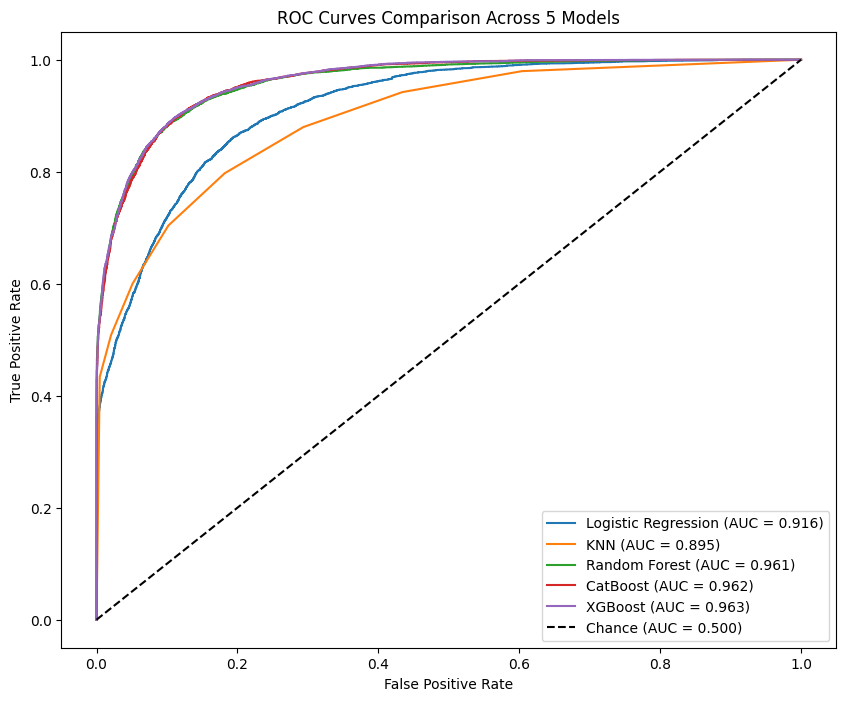

In [64]:
plt.figure(figsize=(10, 8))

# Plot ROC curve for Logistic Regression
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {roc_auc_lr:.3f})")

# Plot ROC curve for KNN
plt.plot(fpr_knn, tpr_knn, label=f"KNN (AUC = {roc_auc_knn:.3f})")

# Plot ROC curve for Random Forest
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_rf:.3f})")

# Plot ROC curve for CatBoost
plt.plot(fpr_cb, tpr_cb, label=f"CatBoost (AUC = {roc_auc_cb:.3f})")

# Plot ROC curve for XGBoost
plt.plot(fpr_xgb, tpr_xgb, label=f"XGBoost (AUC = {roc_auc_xgb:.3f})")

# Plot chance line
plt.plot([0, 1], [0, 1], "k--", label="Chance (AUC = 0.500)")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves Comparison Across 5 Models")
plt.legend(loc="lower right")
plt.show()

> PR Curve Plot

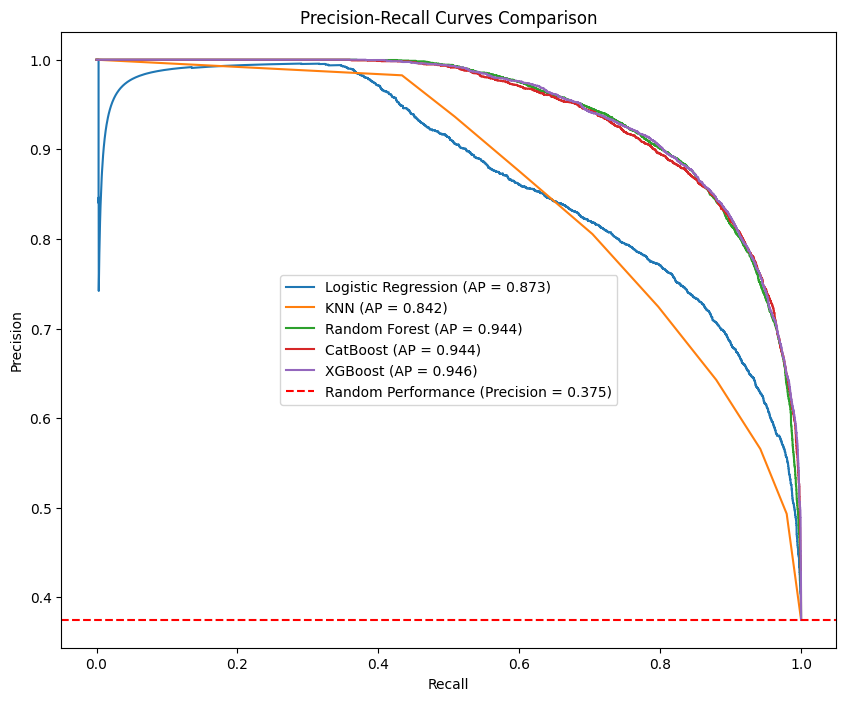

In [65]:
plt.figure(figsize=(10, 8))

# Plot PR curve for Logistic Regression
plt.plot(
    recall_lr,
    precision_lr,
    label=f"Logistic Regression (AP = {average_precision_lr:.3f})",
)

# Plot PR curve for KNN
plt.plot(recall_knn, precision_knn, label=f"KNN (AP = {average_precision_knn:.3f})")

# Plot PR curve for Random Forest
plt.plot(
    recall_rf, precision_rf, label=f"Random Forest (AP = {average_precision_rf:.3f})"
)

# Plot PR curve for CatBoost
plt.plot(recall_cb, precision_cb, label=f"CatBoost (AP = {average_precision_cb:.3f})")

# Plot PR curve for XGBoost
plt.plot(recall_xgb, precision_xgb, label=f"XGBoost (AP = {average_precision_xgb:.3f})")

# Calculate and plot the random performance level line
P = sum(y_val_1 == 1)
N = sum(y_val_1 == 0)
random_classifier_precision = P / (P + N)
plt.axhline(
    y=random_classifier_precision,
    color="r",
    linestyle="--",
    label=f"Random Performance (Precision = {random_classifier_precision:.3f})",
)

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curves Comparison")
plt.legend(loc="best")
plt.show()

> Time Plot

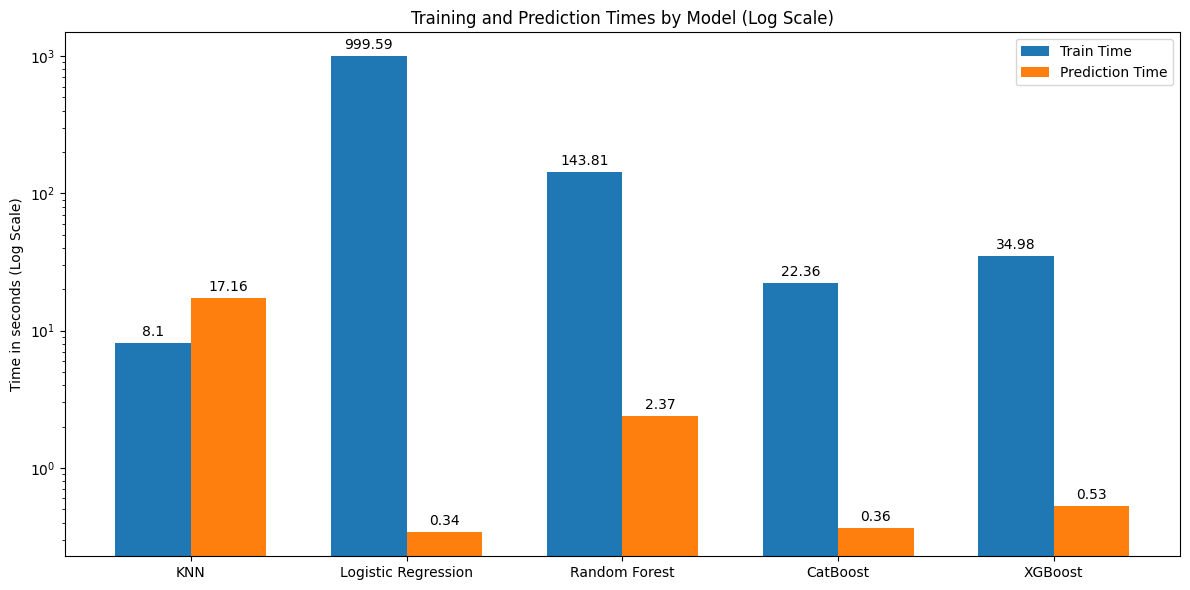

In [72]:
# training and prediction times in seconds
train_times = [
    time_train_knn,
    time_train_lr,
    time_train_rf,
    time_train_catboost,
    time_train_xgboost,
]
predict_times = [
    time_val_knn,
    time_val_lr,
    time_val_rf,
    time_val_catboost,
    time_val_xgboost,
]

# Model names
models = ["KNN", "Logistic Regression", "Random Forest", "CatBoost", "XGBoost"]

# Creating the plot
x = np.arange(len(models))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width / 2, train_times, width, label="Train Time")
rects2 = ax.bar(x + width / 2, predict_times, width, label="Prediction Time")

# Use a logarithmic scale for the y-axis
ax.set_yscale("log")

# Add some text for labels, title, and custom x-axis tick labels.
ax.set_ylabel("Time in seconds (Log Scale)")
ax.set_title("Training and Prediction Times by Model (Log Scale)")
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()


# autolabel bars
def autolabel(rects):
    """Attach a text label above each bar displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(
            "{}".format(round(height, 2)),  # keep 2 deciaml
            xy=(rect.get_x() + rect.get_width() / 2, height),
            xytext=(0, 3),  # 3 points vertical offset
            textcoords="offset points",
            ha="center",
            va="bottom",
        )


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

> ## Process on model selection and hyperparameter tuning
> ### Logistic Regression
>- The logistic regression algorithm is known for its simplicity and effectiveness in binary classification tasks, suitable for my goal of predicting hotel cancellations. For hyperparameter tuning, I focused on the regularization strength (C) and opted for L1 regularization (lasso). The choice of L1 regularization is particularly noteworthy as it not only helps in avoiding overfitting by penalizing large coefficients but also aids in feature selection by driving some coefficients to zero, which is beneficial for interpretability and model simplicity.
>- I employed a grid search approach over 20 logarithmically spaced values of C ranging from $10^{-4}$ to $10^{4}$. This wide range ensures that I thoroughly explore the effect of regularization, from very weak to very strong. The solver 'saga' was chosen for its efficiency with large datasets and L1 penalty, coupled with an increased maximum iteration count to ensure convergence. The performance of each model configuration was evaluated using the AUC metric on the validation dataset. The choice of AUC as the metric aligns with my goal of maximizing the model's discriminatory ability, especially in a likely imbalanced scenario of hotel booking cancellations.
>- After plotting the AUC scores against the corresponding C values on a logarithmic scale, I identified the C value that maximized the validation AUC. This process of visual inspection and empirical analysis led to selecting the best C value for the logistic regression model. The final model, configured with the optimal C value, underwent a final training phase. Finally, I timed the training and prediction processes and evaluated the model's performance on the validation data using the AUC score, ROC curve, Precision-Recall (PR) curve, and Average Precision (AP) score, providing a comprehensive overview of the model's ability to predict hotel cancellations.
> ### KNN
>- I applied the KNN model to predict hotel cancellations. KNN is a non-parametric, instance-based learning method where predictions for new instances are made based on the similarity to training samples. My hyperparameter tuning focused on finding the optimal number of neighbors (K) to use for predictions, which is crucial in balancing the bias-variance trade-off inherent to KNN. A smaller K can make the model overly sensitive to noise in the training data (high variance), while a larger K might make the model too general, potentially ignoring important subtleties (high bias).
>- I conducted a grid search approach over K values from 1 to 50, which provides a broad overview of how the model's performance changes with different neighborhood sizes. I evaluated the model's performance using the AUC score on a validation dataset for each K value. The choice of AUC as the metric aligns with my goal of maximizing the model's discriminatory ability, especially in a likely imbalanced scenario of hotel booking cancellations.
>- Upon plotting the AUC scores against their corresponding K values, I identified the K that maximized the validation AUC. The subsequent steps involved retraining the KNN model with the identified optimal K value, timing the training and prediction processes, and evaluating the final model's performance on the validation set using the AUC score, ROC curve, Precision-Recall (PR) curve, and Average Precision (AP) score, providing a comprehensive overview of the model's ability to predict hotel cancellations.
> ### Random Forest
>- The Random Forest model is a powerful and versatile machine learning algorithm suitable for predicting hotel cancellations. It operates by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) of the individual trees. Random Forests are particularly adept at handling tabular data, which includes a variety of feature types and potentially complex relationships that might be difficult to model with simpler linear models.
>- My approach to tuning the hyperparameters in the Random Forest model involved using RandomizedSearchCV, which randomly samples from the defined parameter distributions. This method is often more efficient than grid search, especially when dealing with a large number of hyperparameters and large datasets, as it can explore a wide parameter space without needing to evaluate every possible combination.
>- I defined a comprehensive range of hyperparameters to explore:
>- **Number of Trees (`n_estimators`):** I allowed for a broad range between 100 to 500 trees, understanding that more trees can improve model accuracy up to a point, beyond which gains diminish.
>- **Maximum Depth of Trees (`max_depth`):** The depth of a tree is the length of the longest path from the root node down to a leaf node. By considering values from 5 to 50 as well as allowing for unlimited depth, I sought to find a balance between model complexity and the risk of overfitting.
>- **Minimum Samples to Split (`min_samples_split`):** This parameter specifies the minimum number of samples required to split an internal node. Sampling from 2 to 10 ensures that trees do not grow too deep by splitting on too few samples, which can lead to overfitting.
>- **Minimum Samples at Leaf Nodes (`min_samples_leaf`):** This parameter defines the minimum number of samples a leaf node must have. This range from 1 to 10 helps in making the model more general by preventing a tree from making splits that result in nodes containing too few samples.
>- By using RandomizedSearchCV with these distributions, I effectively searched through a wide but randomized subset of the hyperparameter space. After identifying the best parameters based on the AUC score across a 5-fold cross-validation, I refined my Random Forest pipeline with these optimized parameters.
>- After training the optimized Random Forest model, I evaluated its performance on the validation data, focusing on the AUC score, a critical metric for binary classification tasks in imbalanced datasets. I timed the training and prediction processes and evaluated the final model's performance on the validation set using the AUC score, ROC curve, Precision-Recall (PR) curve, and Average Precision (AP) score, providing a comprehensive overview of the model's ability to predict hotel cancellations.
> ### Catboost
>- The CatBoost model, a gradient-boosting decision tree algorithm, is specifically designed to handle categorical variables very efficiently, which makes it a compelling choice for predicting hotel cancellations. It utilizes gradient boosting, an ensemble technique that builds trees one at a time, where each new tree helps to correct errors made by previously trained trees. This approach can capture complex patterns and interactions in the data.
>- My process of tuning hyperparameters for CatBoost involved RandomizedSearchCV, a probabilistic approach that selects random combinations of parameter values based on specified distributions:
>- **Learning Rate (`learning_rate`):** I chose to explore a range of values from 0.01 to 0.3. The learning rate controls the speed at which the model learns, with lower values generally leading to more robust models at the cost of requiring more trees (iterations) to converge.
>- **Depth of the Trees (`depth`):** By selecting among depths [4, 6, 8, 10], I allowed for a variety of model complexities, balancing between capturing data intricacies and preventing overfitting.
>- **Number of Trees (`iterations`):** The choice of [100, 200, 300, 400, 500] iterations provided a spectrum for the model to combine multiple trees' decisions, optimizing between performance and computation time.
>- This randomized search over a predefined parameter space allows for efficient exploration of potential models, identifying a combination that maximizes the AUC score. This metric, critical for binary classification tasks, especially in imbalanced datasets, serves as a robust indicator of model performance by measuring its ability to distinguish between the two classes.
>- After training the optimized Catboost model, I evaluated its performance on the validation data, focusing on the AUC score, a critical metric for binary classification tasks in imbalanced datasets. I timed the training and prediction processes and evaluated the final model's performance on the validation set using the AUC score, ROC curve, Precision-Recall (PR) curve, and Average Precision (AP) score, providing a comprehensive overview of the model's ability to predict hotel cancellations.
> ### XGboost
>- XGBoost is a highly effective gradient-boosting decision tree algorithm for supervised learning tasks. XGBoost is built on the principle of gradient boosting, which involves sequentially adding predictors (decision trees) to an ensemble, each one correcting its predecessor. It's particularly well-suited for classification tasks like predicting hotel cancellations due to its efficiency, accuracy, and ability to handle large datasets with a mixture of categorical and numerical features.
>- I’ve employed a comprehensive and strategic approach to tuning XGBoost's hyperparameters using RandomizedSearchCV, focusing on:
>- **`n_estimators` (Number of Trees):** Varying from 100 to 1000, this range allows the model to explore both simpler (fewer trees) and more complex (more trees) models. A higher number of trees can improve model accuracy but also increases the risk of overfitting and computational cost.
>- **`learning_rate`:** This controls the step size at each iteration while moving toward a minimum of a loss function. By exploring values from 0.01 to 0.3, I investigated how fast the model learns, balancing between quick convergence and the risk of overshooting the minimum.
>- **`max_depth`:** This parameter sets the maximum depth of each tree. With values from 3 to 10, I looked to optimize the complexity of the model. Deeper trees can model complex patterns but might lead to overfitting.
>- **`subsample`:** By setting this between 0.6 and 1, I controlled the fraction of the training dataset sampled without replacement for building each tree. Subsampling helps in making the model more robust against noise and overfitting.
>- **`colsample_bytree`:** This parameter specifies the fraction of features to be randomly sampled for each tree. Setting this between 0.6 and 1, it helps in preventing overfitting and adds to the randomness of the model, encouraging feature diversity in the trees.
>- By using RandomizedSearchCV with these distributions, I effectively searched through a wide but randomized subset of the hyperparameter space. After identifying the best parameters based on the AUC score across a 5-fold cross-validation, I refined my XGboost pipeline with these optimized parameters.
>- After training the optimized XGboost model, I evaluated its performance on the validation data, focusing on the AUC score, a critical metric for binary classification tasks in imbalanced datasets. I timed the training and prediction processes and evaluated the final model's performance on the validation set using the AUC score, ROC curve, Precision-Recall (PR) curve, and Average Precision (AP) score, providing a comprehensive overview of the model's ability to predict hotel cancellations.
> ## 5 Model Performance Evaluation
>- In the analysis of ROC curves, Random Forest, CatBoost, and XGBoost showcased exceptional performance, each achieving an AUC score in the vicinity of 0.96, indicating their strong capability in distinguishing between the classes. Despite their robust performance, a nuanced difference placed XGBoost slightly ahead with an AUC score of approximately 0.963, edging out its competitors in this metric. In contrast, KNN and Logistic Regression lagged in their performance, with KNN registering the lowest AUC score of about 0.895. Logistic Regression, on the other hand, recorded an AUC score of approximately 0.916, positioning it better than KNN but still behind the ensemble methods. 
>- The evaluation of PR curves further reinforced these findings, with Random Forest, CatBoost, and XGBoost once again performing comparably well, each securing an Average Precision (AP) score of around 0.94. This consistency across both ROC and PR analyses underscores their effectiveness in handling the prediction task, with XGBoost marginally surpassing the others with an AP score of about 0.946. Conversely, KNN and Logistic Regression lagged in their performance; KNN notably achieved the lowest AP score at approximately 0.842, and Logistic Regression's performance was marked by an initial dip in its PR curve, culminating in an AP score around 0.873.
>- In consideration of computational efficiency, measured by training and prediction times. KNN uniquely required more time for prediction (17.16 seconds) than for training (8.1 seconds), an anomaly among the models evaluated. Logistic Regression, while taking the longest to train (999.59 seconds), boasted the quickest prediction time (0.34 seconds), presenting a stark contrast in its computational demands. Notably, CatBoost and XGBoost demonstrated exceptional efficiency, balancing expedient training times (22.36 seconds for CatBoost and 34.98 seconds for XGBoost) with swift prediction capabilities (under 1 second for both), evidencing their practical utility in time-sensitive applications.
>- In conclusion, XGBoost emerges as the superior model among those evaluated considering the highest AUC and AP scores and good computational efficiency. Its top-tier performance metrics, coupled with its relatively fast training and prediction times, underscore its suitability for the task of predicting hotel cancellations.

**(d) Apply your model "in practice".** Make *at least* 5 submissions of different model results to the competition (more submissions are encouraged and you can submit up to 5 per day!). These do not need to be the same that you report on above, but you should select your *most competitive* models.
- Produce submissions by applying your model on the test data.
- Be sure to RETRAIN YOUR MODEL ON ALL LABELED TRAINING AND VALIDATION DATA before making your predictions on the test data for submission. This will help to maximize your performance on the test data.
- In order to get full credit on this problem you must achieve an AUC on the Kaggle public leaderboard above the "Benchmark" score on the public leaderboard.

> Catboost

In [27]:
# the CatBoost pipeline with the best parameters
final_catboost_pipeline = Pipeline(
    [
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler()),
        (
            "classifier",
            CatBoostClassifier(
                **best_params_catboost_cleaned,  # Use the unpacked, cleaned parameters
                auto_class_weights="Balanced",
                verbose=0,
                random_state=random_state,  # Ensure random_state is defined
            ),
        ),
    ]
)

# Fit the pipeline on the training data + validation data
final_catboost_pipeline.fit(X_train_plus_val, y_train_plus_val)

# Predict the probabilities on the test data
y_test_pred_proba_cb = final_catboost_pipeline.predict_proba(X_test_ohe)[:, 1]

# Path to save the submission file
submission_save_path = "./submission_catboost.csv"

# Generate submission file
create_submission(y_test_pred_proba_cb, submission_save_path)

In [2]:
catboost_result = pd.read_csv("submission_catboost.csv")

print(f"The shape of the CatBoost submission file is {catboost_result.shape}")

The shape of the CatBoost submission file is (23878, 2)


In [6]:
print("The first few rows of the CatBoost submission file are:")
catboost_result.head()

The first few rows of the CatBoost submission file are:


,id,score
0,0,0.999568
1,1,0.000264
2,2,0.055418
3,3,0.002346
4,4,0.486375


> XGBoost

In [30]:
# the XGBoost pipeline with the best parameters
final_xgboost_pipeline = Pipeline(
    [
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler()),
        (
            "classifier",
            XGBClassifier(
                **best_params_xgb_cleaned,  # Use the unpacked, cleaned parameters
                scale_pos_weight=(len(y_train_plus_val) - sum(y_train_plus_val))
                / sum(y_train_plus_val),
                random_state=random_state,
            ),
        ),
    ]
)

# Fit the pipeline on the training data + validation data
final_xgboost_pipeline.fit(X_train_plus_val, y_train_plus_val)

# Predict the probabilities on the test data
y_test_pred_proba_xgb = final_xgboost_pipeline.predict_proba(X_test_ohe)[:, 1]

# Path to save the submission file
submission_save_path = "./submission_xgboost.csv"

# Generate submission file
create_submission(y_test_pred_proba_xgb, submission_save_path)

In [4]:
xgboost_result = pd.read_csv("submission_xgboost.csv")

print(f"The shape of the XGBoost submission file is {xgboost_result.shape}")

The shape of the XGBoost submission file is (23878, 2)


In [7]:
print("The first few rows of the XGBoost submission file are:")
xgboost_result.head()

The first few rows of the XGBoost submission file are:


,id,score
0,0,0.999896
1,1,0.000158
2,2,0.214674
3,3,0.000218
4,4,0.680717


> Random Forest

In [33]:
# Define the Random Forest pipeline with the best parameters
final_random_forest_pipeline = Pipeline(
    [
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler()),
        (
            "classifier",
            RandomForestClassifier(
                **best_params_rf_cleaned,  # Use the unpacked, cleaned parameters
                class_weight="balanced",
                random_state=random_state,
            ),
        ),
    ]
)

# Fit the pipeline on the training data + validation data
final_random_forest_pipeline.fit(X_train_plus_val, y_train_plus_val)

# Predict the probabilities on the test data
y_test_pred_proba_rf = final_random_forest_pipeline.predict_proba(X_test_ohe)[:, 1]

# Path to save the submission file
submission_save_path_rf = "./submission_random_forest.csv"

# Generate submission file
create_submission(y_test_pred_proba_rf, submission_save_path_rf)

In [8]:
random_forest_result = pd.read_csv("submission_random_forest.csv")

print(f"The shape of the Random Forest submission file is {random_forest_result.shape}")

The shape of the Random Forest submission file is (23878, 2)


In [9]:
print("The first few rows of the Random Forest submission file are:")
random_forest_result.head()

The first few rows of the Random Forest submission file are:


,id,score
0,0,0.999915
1,1,0.162338
2,2,0.212855
3,3,0.026141
4,4,0.647628


> KNN

In [36]:
# Define the final KNN pipeline with the best parameters (n_neighbors=8)
final_knn_pipeline = Pipeline(
    [
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler()),
        ("classifier", KNeighborsClassifier(n_neighbors=best_k)),  # use best k value
    ]
)

# Fit the final pipeline on the combined training and validation data
final_knn_pipeline.fit(X_train_plus_val, y_train_plus_val)

# Predict the probabilities on the test data
y_test_pred_proba_knn = final_knn_pipeline.predict_proba(X_test_ohe)[:, 1]

# Path to save the submission file for the final KNN model
submission_save_path_knn = "./submission_knn.csv"

# Generate the submission file with predictions from the final KNN model
create_submission(y_test_pred_proba_knn, submission_save_path_knn)

In [10]:
knn_result = pd.read_csv("submission_knn.csv")

print(f"The shape of the KNN submission file is {knn_result.shape}")

The shape of the KNN submission file is (23878, 2)


In [11]:
print("The first few rows of the KNN submission file are:")
knn_result.head()

The first few rows of the KNN submission file are:


,id,score
0,0,1.000
1,1,0.750
2,2,0.000
3,3,0.000
4,4,0.375


> Logistic Regression

In [39]:
# Define the final logistic regression pipeline with the best parameters
final_lr_pipeline = Pipeline(
    [
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler()),
        (
            "classifier",
            LogisticRegression(
                class_weight="balanced",
                penalty="l1",
                C=best_c,  # Use the best C value
                solver="saga",
                max_iter=1000,
                random_state=random_state,
            ),
        ),
    ]
)

# Fit the final pipeline on the combined training and validation data
final_lr_pipeline.fit(X_train_plus_val, y_train_plus_val)

# Predict the probabilities on the test data
y_test_pred_proba_lr = final_lr_pipeline.predict_proba(X_test_ohe)[:, 1]

# Define the path to save the submission file for the final logistic regression model
final_submission_save_path_lr = "./submission_lr.csv"

# Generate the submission file with predictions from the final logistic regression model
create_submission(y_test_pred_proba_lr, final_submission_save_path_lr)

In [12]:
lr_result = pd.read_csv("submission_lr.csv")

print(f"The shape of the Logistic Regression submission file is {lr_result.shape}")

The shape of the Logistic Regression submission file is (23878, 2)


In [14]:
print("The first few rows of the Logistic Regression submission file are:")
lr_result.head()

The first few rows of the Logistic Regression submission file are:


,id,score
0,0,0.998231
1,1,0.000807
2,2,0.000721
3,3,0.000055
4,4,0.445107


# 2

## [25 points] Clustering

Clustering can be used to reveal structure between samples of data and assign group membership to similar groups of samples. This exercise will provide you with experience applying clustering algorithms and comparing these techniques on various datasets to experience the pros and cons of these approaches when the structure of the data being clustered varies. For this exercise, we'll explore clustering in two dimensions to make the results more tangible, but in practice these approaches can be applied to any number of dimensions.

*Note: For each set of plots across the five datasets, please create subplots within a single figure (for example, when applying DBSCAN - please show the clusters resulting from DBSCAN as a single figure with one subplot for each dataset). This will make comparison easier.*

**(a) Run K-means and choose the number of clusters**. Five datasets are provided for you below and the code to load them below.
- Scatterplot each dataset
- For each dataset run the k-means algorithm for values of $k$ ranging from 1 to 10 and for each plot the "elbow curve" where you plot dissimilarity in each case. Here, you can measure dissimilarity using the within-cluster sum-of-squares, which in sklean is known as "inertia" and can be accessed through the `inertia_` attribute of a fit KMeans class instance.
- For each dataset, where is the elbow in the curve of within-cluster sum-of-squares and why? Is the elbow always clearly visible? When it's not clear, you will have to use your judgment in terms of selecting a reasonable number of clusters for the data. *There are also other metrics you can use to explore to measure the quality of cluster fit (but do not have to for this assignment) including the silhouette score, the Calinski-Harabasz index, and the Davies-Bouldin, to name a few within sklearn alone. However, assessing the quality of fit without "preferred" cluster assignments to compare against (that is, in a truly unsupervised manner) is challenging because measuring cluster fit quality is typically poorly-defined and doesn't generalize across all types of inter- and intra-cluster variation.*
- Plot your clustered data (different color for each cluster assignment) for your best $k$-means fit determined from both the elbow curve and your judgment for each dataset and your inspection of the dataset.

**(b) Apply DBSCAN**. Vary the `eps` and `min_samples` parameters to get as close as you can to having the same number of clusters as your choices with K-means. In this case, the black points are points that were not assigned to clusters.

**(c) Apply Spectral Clustering**. Select the same number of clusters as selected by k-means.

**(d) Comment on the strengths and weaknesses of each approach**. In particular, mention: 
- Which technique worked "best" and "worst" (as defined by matching how human intuition would cluster the data) on each dataset?
- How much effort was required to get good clustering for each method (how much parameter tuning needed to be done)?

*Note: For these clustering plots in this question, do NOT include legends indicating cluster assignment; instead, just make sure the cluster assignments are clear from the plot (e.g. different colors for each cluster)*



Code is provided below for loading the datasets and for making plots with the clusters as distinct colors

In [2]:
################################
# Load the data
################################
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons

# Create / load the datasets:
n_samples = 1500
X0, _ = make_blobs(n_samples=n_samples, centers=2, n_features=2, random_state=0)
X1, _ = make_blobs(n_samples=n_samples, centers=5, n_features=2, random_state=0)

random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state, cluster_std=1.3)
transformation = [[0.6, -0.6], [-0.2, 0.8]]
X2 = np.dot(X, transformation)
X3, _ = make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)
X4, _ = make_moons(n_samples=n_samples, noise=0.12)

X = [X0, X1, X2, X3, X4]
# The datasets are X[i], where i ranges from 0 to 4

In [3]:
################################
# Code to plot clusters
################################
def plot_cluster(ax, data, cluster_assignments):
    """Plot two-dimensional data clusters

    Parameters
    ----------
    ax : matplotlib axis
        Axis to plot on
    data : list or numpy array of size [N x 2]
        Clustered data
    cluster_assignments : list or numpy array [N]
        Cluster assignments for each point in data

    """
    clusters = np.unique(cluster_assignments)
    n_clusters = len(clusters)
    for ca in clusters:
        kwargs = {}
        if ca == -1:
            # if samples are not assigned to a cluster (have a cluster assignment of -1, color them gray)
            kwargs = {"color": "gray"}
            n_clusters = n_clusters - 1
        ax.scatter(
            data[cluster_assignments == ca, 0],
            data[cluster_assignments == ca, 1],
            s=5,
            alpha=0.5,
            **kwargs,
        )
        ax.set_xlabel("feature 1")
        ax.set_ylabel("feature 2")
        ax.set_title(f"No. Clusters = {n_clusters}")
        ax.axis("equal")

**ANSWER**

**(a) Run K-means and choose the number of clusters**. Five datasets are provided for you below and the code to load them below.
- Scatterplot each dataset

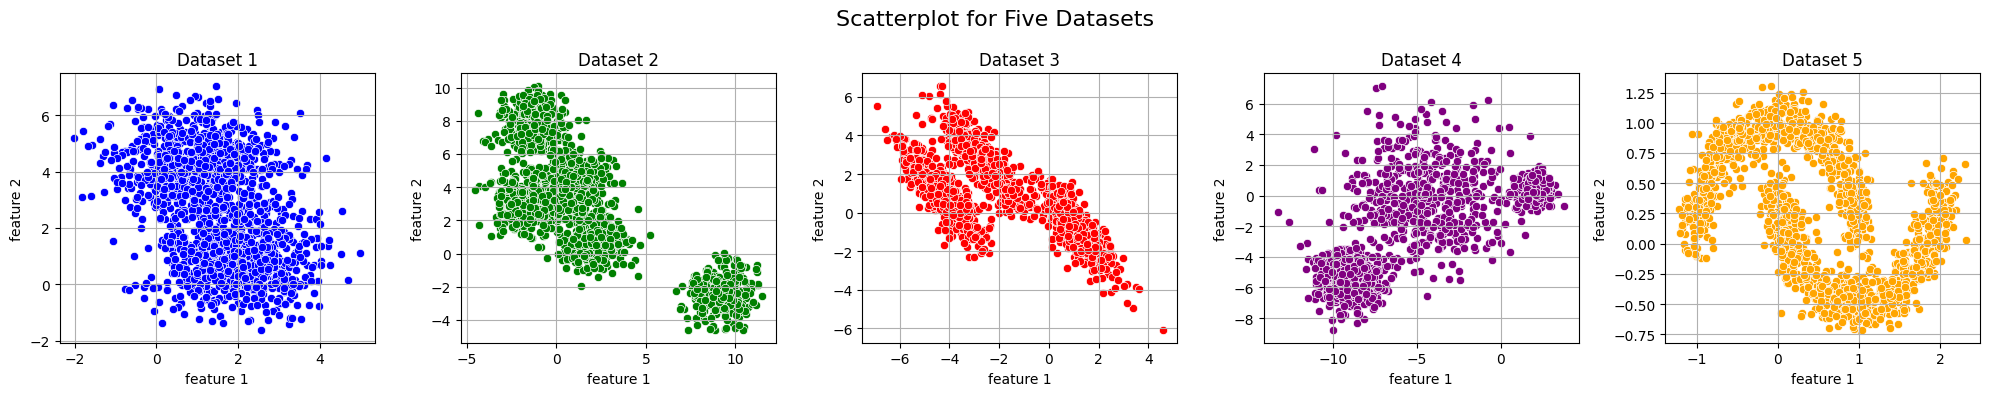

In [5]:
# Number of datasets
n_datasets = len(X)

# Setup the subplot grid
fig, axs = plt.subplots(1, n_datasets, figsize=(20, 4))

colors = ["blue", "green", "red", "purple", "orange"]
titles = ["Dataset 1", "Dataset 2", "Dataset 3", "Dataset 4", "Dataset 5"]

for i in range(n_datasets):
    axs[i].scatter(
        X[i][:, 0],
        X[i][:, 1],
        marker="o",
        # markersize=5,
        linestyle="None",
        color=colors[i],
        edgecolor="w",
        linewidth=0.5,
    )
    axs[i].set_title(titles[i])
    axs[i].set_xlabel("feature 1")
    axs[i].set_ylabel("feature 2")
    axs[i].grid(True)

plt.suptitle(
    "Scatterplot for Five Datasets",
    fontsize=16,
)

plt.tight_layout()
plt.show()

- For each dataset run the k-means algorithm for values of $k$ ranging from 1 to 10 and for each plot the "elbow curve" where you plot dissimilarity in each case. Here, you can measure dissimilarity using the within-cluster sum-of-squares, which in sklean is known as "inertia" and can be accessed through the `inertia_` attribute of a fit KMeans class instance.

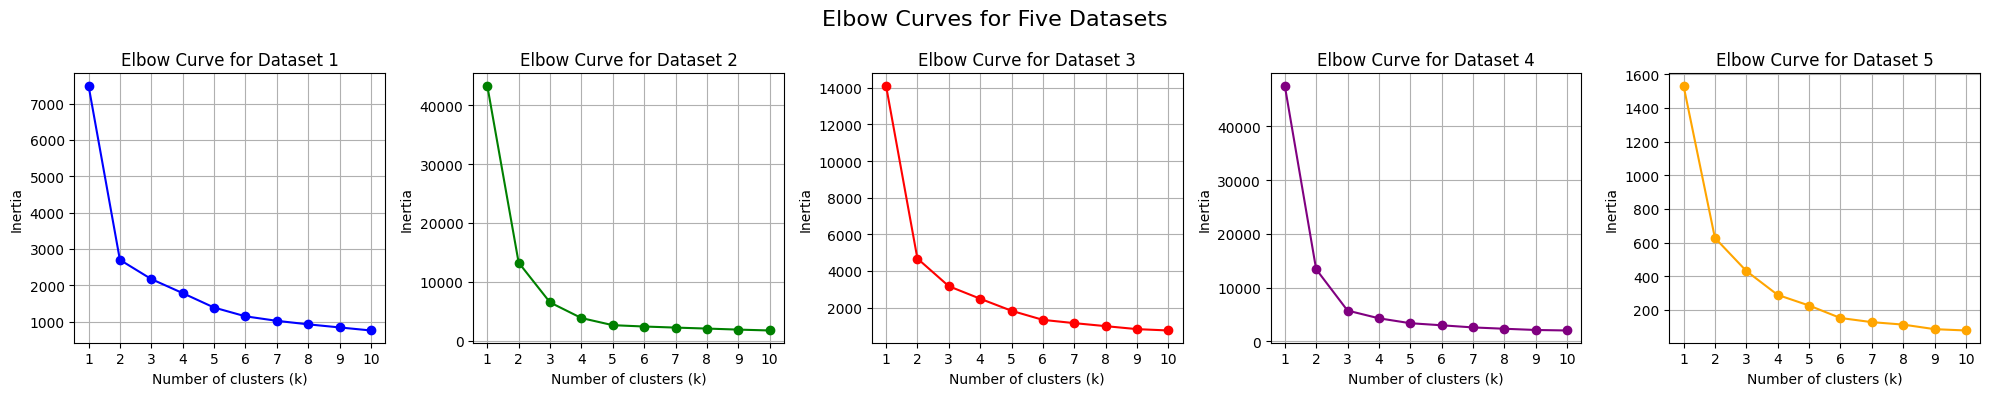

In [6]:
# Prepare the subplot grid
fig, axs = plt.subplots(1, 5, figsize=(20, 4))

# Range of k values
k_values = range(1, 11)

for i in range(n_datasets):
    inertias = []  # Initialize the list to store inertia for the current dataset
    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=random_state).fit(
            X[i]
        )  # fit K-means model
        inertias.append(kmeans.inertia_)

    # Plotting the elbow curve for the current dataset in its subplot
    axs[i].plot(k_values, inertias, marker="o", linestyle="-", color=colors[i])
    axs[i].set_title(f"Elbow Curve for Dataset {i+1}")
    axs[i].set_xlabel("Number of clusters (k)")
    axs[i].set_ylabel("Inertia")
    axs[i].set_xticks(k_values)
    axs[i].grid(True)

plt.suptitle(
    "Elbow Curves for Five Datasets",
    fontsize=16,
)

plt.tight_layout()
plt.show()

- For each dataset, where is the elbow in the curve of within-cluster sum-of-squares and why? Is the elbow always clearly visible? When it's not clear, you will have to use your judgment in terms of selecting a reasonable number of clusters for the data. *There are also other metrics you can use to explore to measure the quality of cluster fit (but do not have to for this assignment) including the silhouette score, the Calinski-Harabasz index, and the Davies-Bouldin, to name a few within sklearn alone. However, assessing the quality of fit without "preferred" cluster assignments to compare against (that is, in a truly unsupervised manner) is challenging because measuring cluster fit quality is typically poorly-defined and doesn't generalize across all types of inter- and intra-cluster variation.*

>- In general, I use the elbow method to choose k. I run k-means for k ranging from 1 to 10 and choose the value of k at the "elbow" of the curve. Increasing the k will improve the fit, but at the cost of potentially overfitting the data. Sometimes, the elbow is not always clearly visible. 
>- Dataset 1 elbow in the curve of within-cluster sum-of-squares is k=2. When k increases to 2, there is a sharp drop in dissimilarity among points within each cluster. However, as k continues to increase, the decrease in dissimilarity drastically slows down. The elbow is clearly visible, leading to my choice of k=2.
>- Dataset 2 elbow in the curve of within-cluster sum-of-squares is k=5. When k increases to 2, there is a sharp drop in dissimilarity among points within each cluster. As k continues to increase, the decrease in dissimilarity slows down. Beyond the point that k=5, there's almost no decrease in dissimilarity as k increases. The elbow is not clearly visible. Thus, I use my own judgment by looking at the original dataset, determining k=5 would makes the most sense as there seems to be 5 clusters in the original dataset.
>- Dataset 3 elbow in the curve of within-cluster sum-of-squares is k=3. When k increases to 2, there is a sharp drop in dissimilarity among points within each cluster. As k continues to increase, the decrease in dissimilarity slows down. The elbow is not clearly visible. Thus, I use my own judgment by looking at the original dataset, determining k=3 would makes the most sense as there seems to be 3 clusters in the original dataset.
>- Dataset 4 elbow in the curve of within-cluster sum-of-squares is k=3. There continues to be sharp decrease in dissimilarity among points within each cluster up to the point where k increases to 3. However, as k continues to increase beyond k=3, the decrease in dissimilarity drastically slows down. The elbow is clearly visible, leading to my choice of k=3.
>- Dataset 5 elbow in the curve of within-cluster sum-of-squares is k=2. When k increases to 2, there is a sharp drop in dissimilarity among points within each cluster. However, as k continues to increase, the decrease in dissimilarity drastically slows down. The elbow is clearly visible, leading to my choice of k=2.

- Plot your clustered data (different color for each cluster assignment) for your best $k$-means fit determined from both the elbow curve and your judgment for each dataset and your inspection of the dataset.

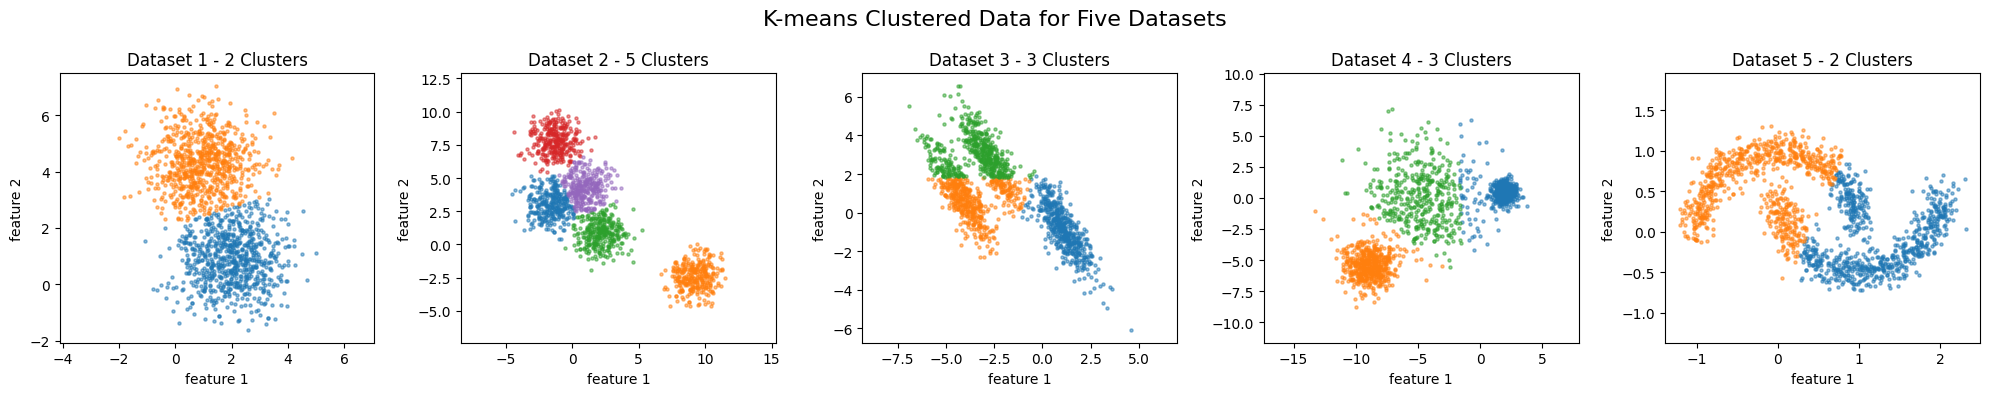

In [7]:
# Best k values determined for datasets 1 to 5
best_k_values = [2, 5, 3, 3, 2]

# Prepare the subplot grid
fig, axs = plt.subplots(1, 5, figsize=(20, 4))

for i, k in enumerate(best_k_values):
    # fit K-means model
    kmeans = KMeans(n_clusters=k, random_state=random_state).fit(X[i])
    plot_cluster(axs[i], X[i], kmeans.labels_)
    axs[i].set_title(f"Dataset {i + 1} - {k} Clusters")

plt.suptitle(
    "K-means Clustered Data for Five Datasets",
    fontsize=16,
)

plt.tight_layout()
plt.show()

>- K-means is centroid-based clustering.
>- K-means excels with clusters of equal variance, so it performs well in Dataset 1 and Dataset 2.
>- K-means struggles when there are nonlinear boundaries between clusters, so it performs worse in Dataset 5. 
>- K-means struggles in situations with variation in cluster variance and correlation between features, so it performs worse in Dataset 4 and Dataset 3.

**(b) Apply DBSCAN**. Vary the `eps` and `min_samples` parameters to get as close as you can to having the same number of clusters as your choices with K-means. In this case, the black points are points that were not assigned to clusters.

In [22]:
# Define parameter search space
eps_values = np.linspace(0.1, 2, 20)
min_samples_values = range(2, 20)

# Initialize a dictionary to save the best match results
best_matches = {}

# Loop through each dataset
for i, (data, desired_clusters) in enumerate(zip(X, best_k_values)):
    best_match = None
    best_balance = float("inf")
    least_noise_for_best_balance = float("inf")  # Initialize with infinity

    # Grid Search for each combination of eps and min_samples
    for eps, min_samples in [(e, m) for e in eps_values for m in min_samples_values]:
        # fit the dbscan model
        dbscan = DBSCAN(eps=eps, min_samples=min_samples).fit(data)
        # calculate number of clusters
        n_clusters = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
        # calculate number of noise points
        noise = list(dbscan.labels_).count(-1)

        # Calculate cluster sizes for each cluster excluding noise
        cluster_sizes = [
            list(dbscan.labels_).count(i) for i in set(dbscan.labels_) if i != -1
        ]

        # Calculate total cluster size
        total_cluster_size = sum(cluster_sizes)

        # check if cluster k is reached and number of noise points not greater than total cluster size
        if n_clusters == desired_clusters and noise <= total_cluster_size:
            # calculate the size difference between the biggest cluster and smallest cluster
            balance = max(cluster_sizes) - min(
                cluster_sizes
            )  # Smaller values are better
            # Prioritize finding a better balance
            if balance < best_balance:
                best_match = (eps, min_samples)
                best_balance = balance
                least_noise_for_best_balance = noise
            # finding the best balance with the least noise
            elif balance == best_balance and noise < least_noise_for_best_balance:
                best_match = (eps, min_samples)
                least_noise_for_best_balance = noise

    best_matches[i] = best_match

    if best_match:
        print(
            f"Dataset {i+1}: Found a match with eps: {best_match[0]}, min_samples: {best_match[1]},"
        )
        print(f"least noise: {least_noise_for_best_balance}, balance: {best_balance}")
    else:
        print(f"Dataset {i+1}: No match found for the desired number of clusters.")

Dataset 1: Found a match with eps: 0.3, min_samples: 17,
least noise: 367, balance: 91
Dataset 2: Found a match with eps: 0.4, min_samples: 18,
least noise: 600, balance: 359
Dataset 3: Found a match with eps: 0.5, min_samples: 19,
least noise: 65, balance: 2
Dataset 4: Found a match with eps: 0.8999999999999999, min_samples: 10,
least noise: 60, balance: 86
Dataset 5: Found a match with eps: 0.1, min_samples: 12,
least noise: 94, balance: 0


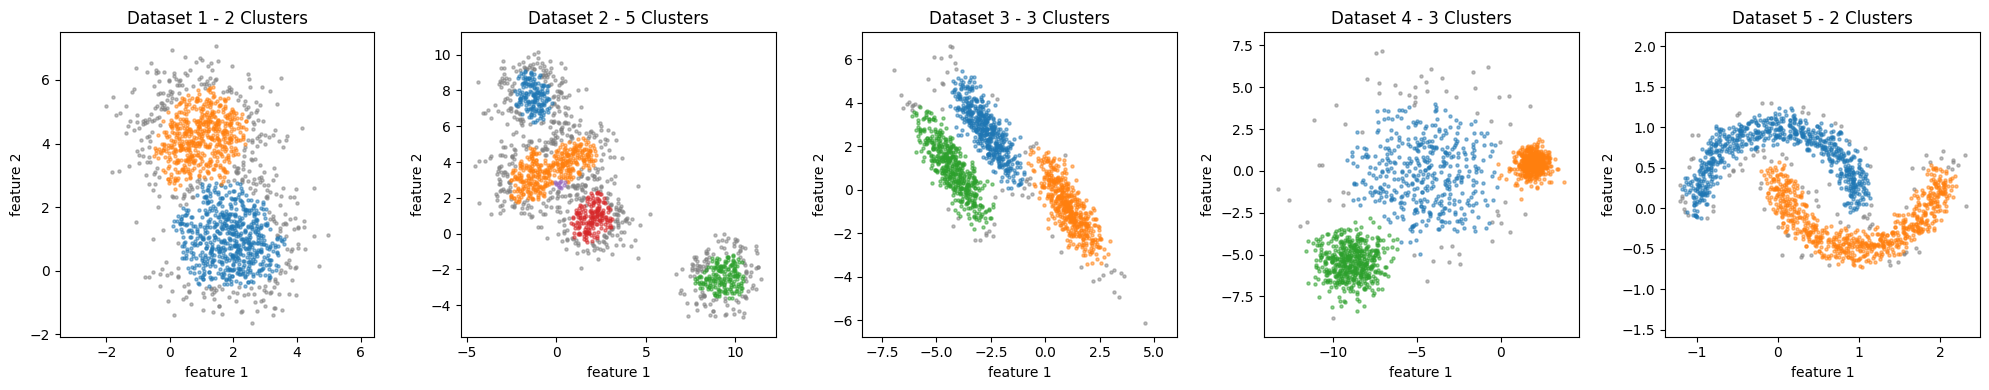

In [23]:
# Define DBSCAN parameters to approximate the k-means clusters
dbscan_params = [
    best_matches[0],
    best_matches[1],
    best_matches[2],
    best_matches[3],
    best_matches[4],
]

# Prepare the subplot grid
fig, axs = plt.subplots(1, 5, figsize=(20, 4))

for i, (params, k) in enumerate(zip(dbscan_params, best_k_values)):
    # Unpack eps and min_samples directly from the tuple
    eps, min_samples = params
    # fit dbscan model
    dbscan = DBSCAN(eps=eps, min_samples=min_samples).fit(X[i])
    plot_cluster(axs[i], X[i], dbscan.labels_)
    axs[i].set_title(f"Dataset {i + 1} - {k} Clusters")

plt.tight_layout()
plt.show()

>- DBSCAN is a density-based clustering. The number of cluster is chosen as part of the algorithm by adjusting "eps" and "min_samples" parameters.
>- In Dataset 2, I cannot match the number of clusters that K-means have by adjusting "eps" and "min_samples" parameters in DBSCAN. I matched the number of clusters that K-means have in the rest of the four datasets using DBSCAN.
>- DBSCAN performs better than K-means in Dataset 4 and Dataset 3, where there's variation in cluster variance and correlation between features.
>- DBSCAN performs better than K-means in Dataset 5, where there are nonlinear boundaries between clusters.

**(c) Apply Spectral Clustering**. Select the same number of clusters as selected by k-means.

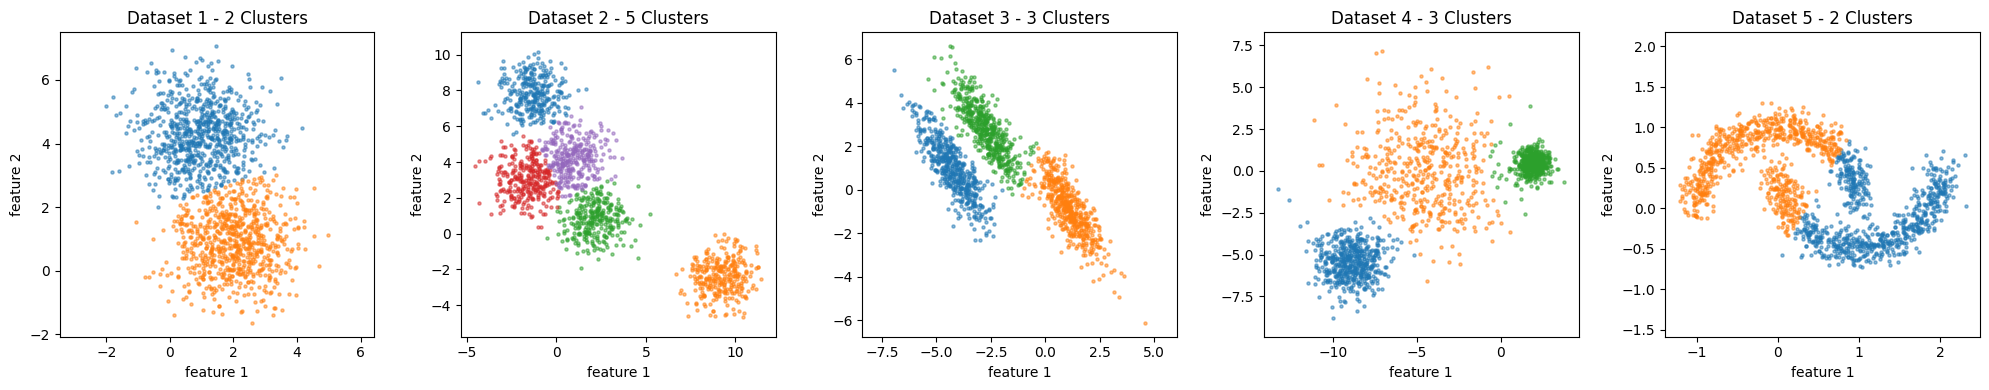

In [14]:
# Prepare the subplot grid for spectral clustering results
fig, axs = plt.subplots(1, 5, figsize=(20, 4))

for i, k in enumerate(best_k_values):
    # Apply Spectral Clustering to the dataset
    spectral = SpectralClustering(
        n_clusters=k,
        random_state=random_state,
    ).fit(X[i])
    plot_cluster(axs[i], X[i], spectral.labels_)
    axs[i].set_title(f"Dataset {i + 1} - {k} Clusters")

plt.tight_layout()
plt.show()

>- Spectral Clustering is a graph-based clustering based on data similarities. It focuses on connectiveness.
>- Spectral Clustering performs well in Dataset 1, Dataset 2, Dataset3 and Dataset 4. However, it performs worse in Dataset 5.

**(d) Comment on the strengths and weaknesses of each approach**. In particular, mention: 
- Which technique worked "best" and "worst" (as defined by matching how human intuition would cluster the data) on each dataset?
- How much effort was required to get good clustering for each method (how much parameter tuning needed to be done)?

> ## Strengths and Weakness of Each Approach

> ### K-means 
>- #### Strengths
>- K-means is centroid-based clustering. It converges very quickly.
>- K-means excels with clusters of equal variance, so it performs well in Dataset 1 and Dataset 2.

>- #### Weakness 
>- K-means is sensitive to initialization of means.
>- K-means requires specifying number of clusters.
>- K-means struggles when there are nonlinear boundaries between clusters, so it performs worse in Dataset 5. 
>- K-means struggles in situations with variation in cluster variance and correlation between features, so it performs worse in Dataset 4 and Dataset 3.

> ### DBSCAN
>- #### Strengths 
>- DBSCAN is a density-based clustering. The number of cluster is chosen as part of the algorithm.
>- DBSCAN can find arbitrarily shaped clusters.
>- DBSCAN is robust to outliers.
>- DBSCAN performs better than K-means in Dataset 4 and Dataset 3, where there's variation in cluster variance and correlation between features.
>- DBSCAN performs better than K-means in Dataset 5, where there are nonlinear boundaries between clusters.

>- #### Weakness 
>- DBSCAN require us to choose the density parameters. Two parameters tuning epsilon ("eps": defines the radius of neighborhood around a point x) and minimum points("min_samples": defines the minimum number of neighbors within “eps” radius) need to be done. 
>- DBSCAN can't handle significant variation in cluster density.
>- DBSCAN is not entirely deterministic (Border points reachable from more than one cluster may be assigned to either)
>- In Dataset 2, I cannot match the number of clusters that K-means have by adjusting "eps" and "min_samples" parameters in DBSCAN. I matched the number of clusters that K-means have in the rest of the four datasets using DBSCAN.

> ### Spectral Clustering 
>- #### Strengths
>- Spectral Clustering is a graph-based clustering based on data similarities. It focuses on connectiveness instead of compactness.
>- The location alone does not determine similarity or "affinity"
>- Spectral Clustering makes few assumptions about data, so often produces good clustering results.
>- Spectral Clustering performs well in Dataset 1, Dataset 2, Dataset3 and Dataset 4. 

>- #### Weakness 
>- Spectral Clustering is slow for large datasets.
>- Spectral Clustering requires specifying number of clusters.
>- Spectral Clustering performs worse in Dataset 5.

> ## Which technique works best and worse on each dataset
>- Dataset 1: K-means, DBSCAN and Spectral Clustering works equally well.
>- Dataset 2: K-means and Spectral Clustering works equally well. DBSCAN performs the worst (can't match the number of clusters that K-means have).
>- Dataset 3: DBSCAN and Spectral Clustering works equally well. K-means performs the worst.
>- Dataset 4: DBSCAN and Spectral Clustering works equally well. K-means performs the worst.
>- Dataset 5: DBSCAN performs the best, K-means and spectral clustering performs the worst. 

> ## How much effort was required to get good clustering for each method 
>- K-means: Only the number of clusters (n_clusters=k) need to be tuned. Determining the optimal k typically involves techniques like the elbow method.
>- DBSCAN: Two parameters tuning epsilon ("eps": defines the radius of neighborhood around a point x) and minimum points("min_samples": defines the minimum number of neighbors within “eps” radius) need to be done. It requires a lot more effort to tune than K-means and spectral clustering due to the need to understand the data's density characteristics. The number of cluster is chosen as part of the algorithm. 
>- Spectral Clustering: Primarily involves tuning the number of clusters (n_clusters=k). 

# 3

## [25 points] Dimensionality reduction and visualization of digits with PCA and t-SNE

**(a)** Reduce the dimensionality of the data with PCA for data visualization. Load the `scikit-learn` digits dataset (code provided to do this below). Consider whether any preprocessing may need to be applied (do the data need to be normalized?). Apply PCA and reduce the data (with the associated cluster labels 0-9) into a 2-dimensional space. Plot the data with labels in this two dimensional space (labels can be colors, shapes, or using the actual numbers to represent the data - definitely include a legend in your plot).

**(b)** Create a plot showing the cumulative fraction of variance explained as you incorporate from $1$ through all $D$ principal components of the data (where $D$ is the dimensionality of the data). 
- What fraction of variance in the data is UNEXPLAINED by the first two principal components of the data? 
- Briefly comment on how this may impact how well-clustered the data are. 
*You can use the `explained_variance_` attribute of the PCA module in `scikit-learn` to assist with this question*

**(c)** Reduce the dimensionality of the data with t-SNE for data visualization. T-distributed stochastic neighborhood embedding (t-SNE) is a nonlinear dimensionality reduction technique that is particularly adept at embedding the data into lower 2 or 3 dimensional spaces. Apply t-SNE using the `scikit-learn` implementation to the digits dataset and plot it in 2-dimensions (with associated cluster labels 0-9). You may need to adjust the parameters to get acceptable performance. You can read more about how to use t-SNE effectively [here](https://distill.pub/2016/misread-tsne/).

**(d)** Briefy compare/contrast the performance of these two techniques. 
- Which seemed to cluster the data best and why?
- Notice that while t-SNE has a `fit` method and a `fit_transform` method, these methods are actually identical, and there is no `transform` method. Why is this? What implications does this imply for using this method?

*Note: Remember that you typically will not have labels available in most problems.*

Code is provided for loading the data below.

In [15]:
################################
# Load the data
################################
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# load dataset
digits = datasets.load_digits()
n_sample = digits.target.shape[0]
n_feature = digits.images.shape[1] * digits.images.shape[2]
X_digits = np.zeros((n_sample, n_feature))
for i in range(n_sample):
    X_digits[i, :] = digits.images[i, :, :].flatten()
y_digits = digits.target

**ANSWER**

**(a)** Reduce the dimensionality of the data with PCA for data visualization. Load the `scikit-learn` digits dataset (code provided to do this below). Consider whether any preprocessing may need to be applied (do the data need to be normalized?). Apply PCA and reduce the data (with the associated cluster labels 0-9) into a 2-dimensional space. Plot the data with labels in this two dimensional space (labels can be colors, shapes, or using the actual numbers to represent the data - definitely include a legend in your plot).

In [29]:
# Inspect the data
print("Data shape of digits:", X_digits.shape)
print("Data type of digits:", X_digits.dtype)
print("Data shape of digits labels:", y_digits.shape)
print("Data type of digits labels:", y_digits.dtype)

Data shape of digits: (1797, 64)
Data type of digits: float64
Data shape of digits labels: (1797,)
Data type of digits labels: int64


In [27]:
# Calculate summary statistics
means = np.mean(X_digits, axis=0)
std_devs = np.std(X_digits, axis=0)

# Display summary statistics
print("Mean values of digits features:")
print(means)
print("\nStandard deviation of digits features:")
print(std_devs)

Mean values of digits features:
[0.00000000e+00 3.03839733e-01 5.20478575e+00 1.18358375e+01
 1.18480801e+01 5.78185865e+00 1.36227045e+00 1.29660545e-01
 5.56483027e-03 1.99387869e+00 1.03823038e+01 1.19794101e+01
 1.02793545e+01 8.17584864e+00 1.84641068e+00 1.07957707e-01
 2.78241514e-03 2.60155815e+00 9.90317195e+00 6.99276572e+00
 7.09794101e+00 7.80634391e+00 1.78853645e+00 5.00834725e-02
 1.11296605e-03 2.46967168e+00 9.09126322e+00 8.82136895e+00
 9.92710072e+00 7.55147468e+00 2.31775181e+00 2.22593211e-03
 0.00000000e+00 2.33945465e+00 7.66722315e+00 9.07178631e+00
 1.03016138e+01 8.74401781e+00 2.90929327e+00 0.00000000e+00
 8.90372844e-03 1.58375070e+00 6.88146912e+00 7.22815804e+00
 7.67223150e+00 8.23650529e+00 3.45631608e+00 2.72676683e-02
 7.23427935e-03 7.04507513e-01 7.50695604e+00 9.53923205e+00
 9.41624930e+00 8.75848637e+00 3.72509738e+00 2.06455203e-01
 5.56483027e-04 2.79354480e-01 5.55759599e+00 1.20890373e+01
 1.18091263e+01 6.76405120e+00 2.06789093e+00 3.64496

In [28]:
mins = np.min(X_digits, axis=0)
maxs = np.max(X_digits, axis=0)
print("\nMinimum values of digits features:")
print(mins)
print("\nMaximum values of digits features:")
print(maxs)


Minimum values of digits features:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

Maximum values of digits features:
[ 0.  8. 16. 16. 16. 16. 16. 15.  2. 16. 16. 16. 16. 16. 16. 12.  2. 16.
 16. 16. 16. 16. 16.  8.  1. 15. 16. 16. 16. 16. 15.  1.  0. 14. 16. 16.
 16. 16. 14.  0.  4. 16. 16. 16. 16. 16. 16.  6.  8. 16. 16. 16. 16. 16.
 16. 13.  1.  9. 16. 16. 16. 16. 16. 16.]


>- According the description of the training data, most features's mean is not close to 0 and standard deviation is not close to 1. They have a different range of values and variability, indicating significant scale differences and need for normalization.

In [16]:
# Standardize the data
scaler = StandardScaler()
X_digits_standardized = scaler.fit_transform(X_digits)

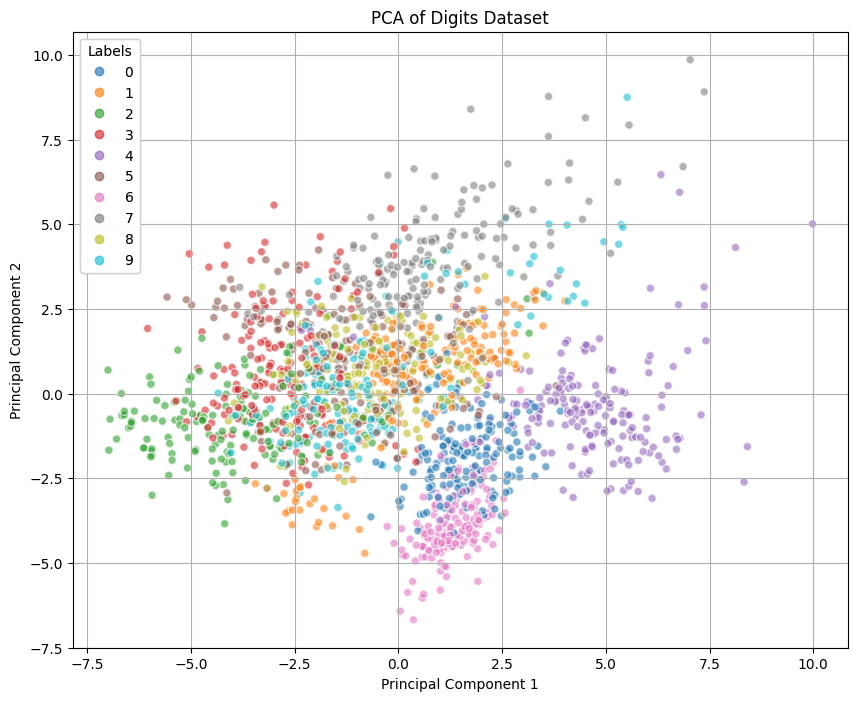

In [17]:
# Apply PCA to reduce to 2 dimensions
pca_2 = PCA(n_components=2)
# fit the pca to the digits data
X_pca = pca_2.fit_transform(X_digits_standardized)

# Plot the PCA-transformed data
plt.figure(figsize=(10, 8))
scatter = plt.scatter(
    X_pca[:, 0], X_pca[:, 1], c=y_digits, cmap="tab10", alpha=0.6, edgecolor="w"
)
plt.title("PCA of Digits Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)

# Add a legend
legend1 = plt.legend(*scatter.legend_elements(), title="Labels")
plt.gca().add_artist(legend1)

plt.show()

**(b)** Create a plot showing the cumulative fraction of variance explained as you incorporate from $1$ through all $D$ principal components of the data (where $D$ is the dimensionality of the data). 
- What fraction of variance in the data is UNEXPLAINED by the first two principal components of the data? 
- Briefly comment on how this may impact how well-clustered the data are. 
*You can use the `explained_variance_` attribute of the PCA module in `scikit-learn` to assist with this question*

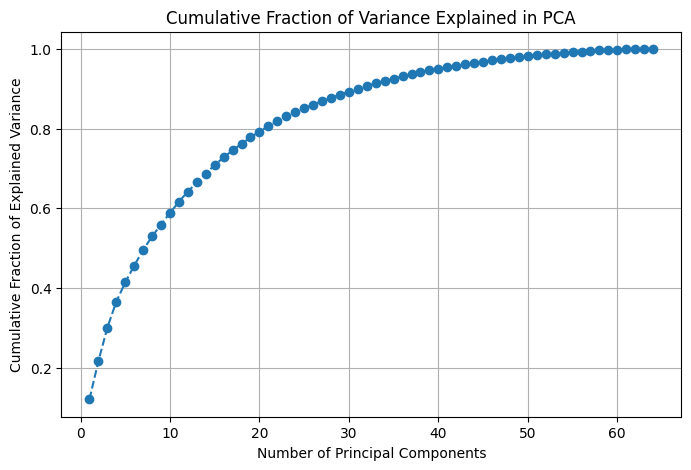

Fraction of variance unexplained by the first two components: 78.41%


In [18]:
# Fit PCA on the standardized data without reducing dimensionality
pca_new = PCA()
pca_new.fit(X_digits_standardized)

# Calculate the cumulative sum of explained variance ratios
cumulative_var_explained = np.cumsum(pca_new.explained_variance_ratio_)

# Plot the cumulative fraction of variance explained
plt.figure(figsize=(8, 5))
plt.plot(
    range(1, len(cumulative_var_explained) + 1),
    cumulative_var_explained,
    marker="o",
    linestyle="--",
)
plt.title("Cumulative Fraction of Variance Explained in PCA")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Fraction of Explained Variance")
plt.grid(True)

plt.show()

# Calculate the fraction of variance UNEXPLAINED by the first two components
unexplained_var_by_first_two = 1 - cumulative_var_explained[1]
print(
    f"Fraction of variance unexplained by the first two components: {unexplained_var_by_first_two*100:.2f}%"
)

>- The graph demonstrates the cumulative fraction of variance explained in PCA. As the number of principal components increases, the cumulative fraction of explained variance increases. The more principal components included, the more of the variance will be represented in the projected data. 
>- Fraction of variance unexplained by the first two components is around 78.41%, indicating the first two principal compoenents can only explain a very small percentage of variance. It indicates that a large portion of the data's structure and variation lies beyond the first two dimensions, suggesting the dataset has a complex, high-dimensional structure, making it challenging to capture the essence of the data in a low-dimensional space. 
>- Since a significant amount of variance is unexplained by the first few components, applying PCA and reducing the data into a 2-dimensional space struggles to find meaningful groupings in the reduced-dimensional space, resulting in not well-clustered data. Clusters that are distinct in higher-dimensional space overlaps and becomes indistinct when projected onto the first two principal components, as shown in the PCA of digit dataset graph in question (a).

**(c)** Reduce the dimensionality of the data with t-SNE for data visualization. T-distributed stochastic neighborhood embedding (t-SNE) is a nonlinear dimensionality reduction technique that is particularly adept at embedding the data into lower 2 or 3 dimensional spaces. Apply t-SNE using the `scikit-learn` implementation to the digits dataset and plot it in 2-dimensions (with associated cluster labels 0-9). You may need to adjust the parameters to get acceptable performance. You can read more about how to use t-SNE effectively [here](https://distill.pub/2016/misread-tsne/).

>- In the t-SNE model, I chose `n_components`=2 to reduce the data to 2 dimensions.
>- I selected a perplexity of 50, which is a guess about the number of close neighbors each point has. This defines how to balance attention between local and global aspects of my data. The performance of t-SNE is fairly robust to changes in perplexity, with typical values ranging between 5 and 50.
>- I chose a learning rate of 10 and `n_iter`=5000 because running the model for 5,000 iterations ("steps")with a learning rate (“epsilon”) of 10 typically reaches a point of stability and convergence.

In [19]:
# Building t-SNE model with specified parameters
tsne = TSNE(
    n_components=2,
    perplexity=50,
    learning_rate=10,
    n_iter=5000,
    random_state=random_state,
)

# Apply t-SNE to the data
X_tsne = tsne.fit_transform(X_digits_standardized)

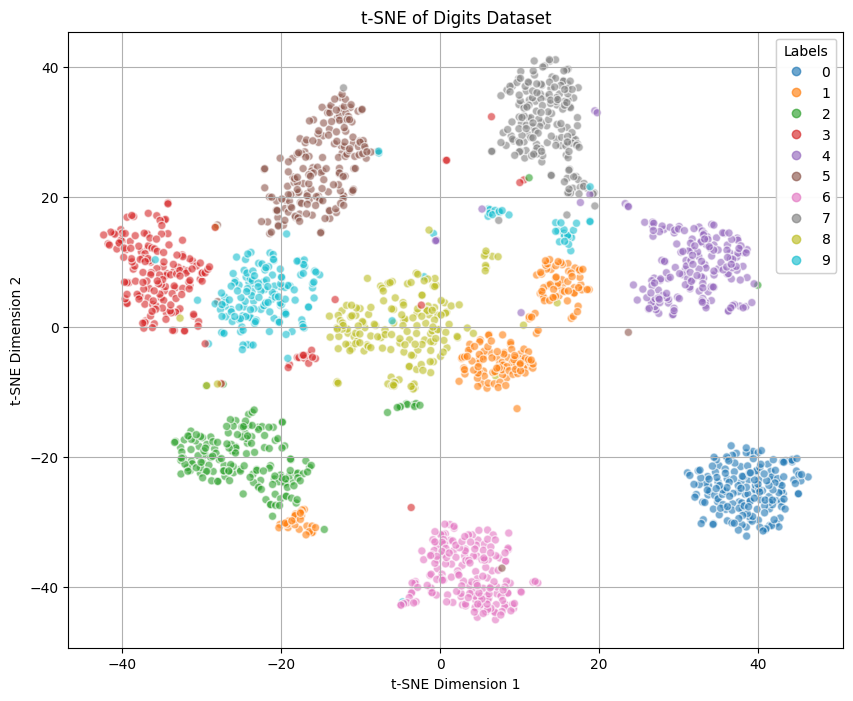

In [21]:
# Plot the t-SNE-transformed data
plt.figure(figsize=(10, 8))
scatter = plt.scatter(
    X_tsne[:, 0], X_tsne[:, 1], c=y_digits, cmap="tab10", alpha=0.6, edgecolor="w"
)
plt.title("t-SNE of Digits Dataset")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.grid(True)

# Add a legend
legend1 = plt.legend(*scatter.legend_elements(), title="Labels")
plt.gca().add_artist(legend1)

plt.show()

**(d)** Briefy compare/contrast the performance of these two techniques. 
- Which seemed to cluster the data best and why?
- Notice that while t-SNE has a `fit` method and a `fit_transform` method, these methods are actually identical, and there is no `transform` method. Why is this? What implications does this imply for using this method?

>- The t-SNE cluster the data the best. 
>- PCA linearly projects data onto axes defined by the directions of maximum variance, it may not capture the complexity of data structures that are inherently non-linear. Applying PCA and reducing the data into a 2-dimensional space struggles to find meaningful groupings in the reduced-dimensional space, resulting in not well-clustered data. Clusters that are distinct in higher-dimensional space overlaps and becomes indistinct when projected onto the first two principal components, as shown in the PCA of digit dataset graph in question (a).
>- In contrast, the t-SNE algorithm is non-linear and adapts to the underlying data, performing different transformations on different regions. t-SNE excels in preserving local relationships between data points and is capable of uncovering intricate data structures in the reduced-dimensional space. It is particularly adept at embedding the data into lower 2 or 3 dimensional spaces. By focusing on preserving local structures and being less constrained by the global structure of the data, t-SNE provides a more nuanced and often more useful visualization of high-dimensional datasets. The resulting two-dimensional embedding by t-SNE appears to be well-clustered, as shown in the t-SNE of digits dataset graph in question (c).
>- t-SNE lacks a `transform` method because it's a non-linear technique that differs fundamentally from linear methods like PCA. It computes the probability distribution of point pairs in high-dimensional space to replicate in lower-dimensional space, a process tailored to each specific dataset. This makes t-SNE dependent on the entire dataset for positioning points in the reduced space, as it doesn't produce a generalizable transformation matrix for new data. Therefore, unlike methods that learn a fixed transformation, t-SNE can't apply learned embeddings to unseen data, rendering a `transform` method irrelevant.
>- Because t-SNE cannot be applied to new, unseen data points after the initial fit, all data must be available and processed in a single batch. This limits its use for applications where the dataset changes over time. It is challenging to apply t-SNE to multiple related datasets or to a dataset that gets updated over time while maintain a consistent embedding across different t-SNE runs. Given these characteristics, t-SNE is best used as a tool for exploratory data analysis rather than as a preprocessing step for other machine learning models. 

---

## Citation 

Catboost. (n.d.). Catboost classifier for imbalance target variable and impact of randomness Â· Issue #1459 Â· catboost/catboost. GitHub. https://github.com/catboost/catboost/issues/1459

Dip in precision / recall curve. (n.d.). Cross Validated. https://stats.stackexchange.com/questions/520298/dip-in-precision-recall-curve

How to display the value on horizontal bars. (n.d.). Stack Overflow. https://stackoverflow.com/questions/30228069/how-to-display-the-value-on-horizontal-bars

Overview - CatBoostClassifier |. (n.d.). https://catboost.ai/en/docs/concepts/python-reference_catboostclassifier

Unbalanced multiclass data with XGBoost. (n.d.). Data Science Stack Exchange. https://datascience.stackexchange.com/questions/16342/unbalanced-multiclass-data-with-xgboost

Wattenberg, M., Viegas, F. B., & Johnson, I. (2016). How to use T-SNE effectively. Distill, 1(10). https://doi.org/10.23915/distill.00002

I used ChatGPT to check my grammer in Question 1 (c), Question 2 (d), Question 3 (b) (c) (d) with the prompt, “Revise the grammer in the following paragraph {}”